In [116]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

from matplotlib.pyplot import figure


import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE


import numpy as np
from scipy.stats import chi2_contingency

In [2]:
application_data = pd.read_csv('dataset/application_data.csv')

In [3]:
previous_application = pd.read_csv('dataset/previous_application.csv')

In [4]:
columns_description = pd.read_csv('dataset/columns_description.csv',skiprows=0)

In [5]:
list(application_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [6]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [7]:
columns_description.columns = ['SNo', 'Table', 'Column', 'Description', 'Special']

In [8]:
columns_description[columns_description['Table'] == 'application_data']

,SNo,Table,Column,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_data,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_data,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_data,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_data,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [9]:
print('Total Application data: ', len(application_data))
print('Total Previous Application data: ', len(previous_application))

Total Application data:  307511
Total Previous Application data:  1670214


In [10]:
len(application_data['SK_ID_CURR'].unique())

307511

In [11]:
application_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
merged_applications = application_data.merge(previous_application, how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
print('Length of Merged datasets: ', len(merged_applications))
# print('Common ID between both datasets: ', len(merged_applications.unique()))

Length of Merged datasets:  1413701


In [13]:
application_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# TARGET 0 is Repayer and TARGET 1 is Defaulter

# Duplication Check

In [14]:
application_data.duplicated().sum()

0

In [15]:
previous_application.duplicated().sum()

0

In [16]:
## check duplicates
print('Duplicates: ', merged_applications.duplicated())

Duplicates:  0          False
1          False
2          False
3          False
4          False
           ...  
1413696    False
1413697    False
1413698    False
1413699    False
1413700    False
Length: 1413701, dtype: bool


There are no duplicates in the dataset

# Missing Values

In [17]:
#check null
merged_applications.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED      1408910
RATE_INTEREST_PRIMARY         1408910
COMMONAREA_MODE                985199
COMMONAREA_MEDI                985199
COMMONAREA_AVG                 985199
                               ...   
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
SK_ID_CURR                          0
Length: 158, dtype: int64

In [18]:
cols_null_percntge = pd.DataFrame(application_data.isnull().sum() / application_data.shape[0] * 100.0).reset_index()
cols_null_percntge.columns = ['Column Name', 'Percentage']

In [19]:
cols_null_percntge

,Column Name,Percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [20]:
## Used 35% instead of 20% in order to confirm coorelation of OCCUPATION_TYPE }
application_data.OCCUPATION_TYPE.value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
irrelevant_cols = cols_null_percntge[cols_null_percntge.Percentage > 35].sort_values(by='Percentage', ascending=False)

In [22]:
irrelevant_cols

,Column Name,Percentage
48,COMMONAREA_AVG,69.872297
76,COMMONAREA_MEDI,69.872297
62,COMMONAREA_MODE,69.872297
84,NONLIVINGAPARTMENTS_MEDI,69.432963
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
86,FONDKAPREMONT_MODE,68.386172
82,LIVINGAPARTMENTS_MEDI,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953
68,LIVINGAPARTMENTS_MODE,68.354953


Missing Value columns - used 35% instead of 20% as threshold because OCCUPATION TYPE (31% missing values) might contribute in the predictions

Drop columns above 35% missing value threshold

In [23]:
application_data.drop(irrelevant_cols['Column Name'], axis=1, inplace=True)

In [24]:
len(application_data.columns)

73

In [25]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [26]:
def fetch_numerical_and_cateogrical_columns(df):
    return list(set(df.select_dtypes("number").columns)), list(set(application_data.select_dtypes("object").columns))

In [27]:
numerical_cols, categorical_cols = fetch_numerical_and_cateogrical_columns(application_data)

In [28]:
numerical_cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_11',
 'AMT_GOODS_PRICE',
 'FLAG_DOCUMENT_12',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_7',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_13',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_4',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_18',
 'DAYS_BIRTH',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_DOCUMENT_21',
 'TARGET',
 'SK_ID_CURR',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_C

In [29]:
categorical_cols

['WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE']

In [30]:
for cols in categorical_cols:
    print('------------------- ', cols, '------------------- ')
    print(application_data[cols].value_counts(dropna=False))

-------------------  WEEKDAY_APPR_PROCESS_START ------------------- 
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
-------------------  NAME_HOUSING_TYPE ------------------- 
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
-------------------  OCCUPATION_TYPE ------------------- 
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill La

31.3% OCCUPATION_TYPE contains NaN - We will impute NaN by 'Unknown'

In [31]:
application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

Since NaN is 0.4% in NAME_TYPE_SUITE, we will impute by mode 'Unaccompanied' since it contributes 80% of the values

In [32]:
application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [33]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Check for numerical values to compute as per the description

In [34]:
cols_to_compute = ['DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH'
]

In [35]:
application_data[cols_to_compute].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [36]:
application_data[cols_to_compute] = application_data[cols_to_compute].abs()

In [37]:
application_data[cols_to_compute].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458


In [38]:
application_data['AGE'] = application_data['DAYS_BIRTH'] // 365

In [39]:
application_data['AGE'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [40]:
application_data['AGE'].value_counts()

38    8873
37    8799
39    8770
40    8624
36    8614
27    8476
41    8449
31    8377
43    8308
42    8216
28    7975
32    7911
44    7819
30    7806
35    7804
33    7714
29    7670
34    7631
54    7551
53    7457
46    7293
45    7205
47    7018
48    6984
56    6828
57    6768
52    6763
51    6689
55    6637
59    6631
49    6627
50    6482
58    6268
60    6227
62    5514
61    5418
63    5197
64    5117
26    4561
25    4168
23    4057
24    3905
65    3113
22    2933
66    2085
67    2042
21    1254
68     866
69      16
20       1
Name: AGE, dtype: int64

Let's create bins for analysis

In [174]:
bins = [0, 20, 30, 40, 50, 60, 100]

labels = ['0 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 above']

application_data['AGE_GROUP'] = pd.cut(application_data['AGE'], bins = bins, labels = labels)

In [175]:
application_data['AGE_GROUP'].value_counts()

30 - 40     83117
40 - 50     74401
50 - 60     67819
20 - 30     52805
60 above    29368
0 - 20          1
Name: AGE_GROUP, dtype: int64

Through the argument normalize=True, we can get percentage ratio of the total loan applicants for each age group

In [43]:
application_data['AGE_GROUP'].value_counts(normalize=True)*100

30 - 40     27.028952
40 - 50     24.194582
50 - 60     22.054170
20 - 30     17.171743
60 above     9.550227
0 - 20       0.000325
Name: AGE_GROUP, dtype: float64

31.6% of loan applicants are above 50 age
whereas, 44.2% of loan applicants are below 40 age


In [169]:
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [170]:
application_data['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [184]:
bins = [0, 100000, 200000, 300000, 400000, 500000,1000000]

labels = ['0 - 100K', '100K - 200K', '200K - 300K', '300K - 400K', '400K - 500K', '500K Above']

application_data['AMT_INCOME_GROUP'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins = bins, labels = labels)

In [ ]:
11,700,000

In [ ]:
25,650.0

In [186]:
application_data['AMT_INCOME_GROUP'].value_counts()

100K - 200K    155898
200K - 300K     65176
0 - 100K        63698
300K - 400K     14676
400K - 500K      5361
500K Above       2452
Name: AMT_INCOME_GROUP, dtype: int64

In [187]:
application_data[application_data['AMT_INCOME_GROUP'] == '500K Above']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP,PREVIOUS_APPLICATIONS_COUNT,AMT_INCOME_GROUP
51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,1.0,0.0,0.0,3.0,51,50 - 60,19,10 years,18.0,500K Above
59,100070,0,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,...,0.0,0.0,0.0,0.0,56,50 - 60,5,Fresh,2.0,500K Above
319,100366,0,Revolving loans,M,Y,Y,0,765000.0,1350000.0,67500.0,...,0.0,0.0,0.0,0.0,32,30 - 40,8,5 years,0.0,500K Above
332,100380,0,Cash loans,F,N,Y,0,630000.0,900000.0,57519.0,...,0.0,0.0,0.0,1.0,41,40 - 50,4,Fresh,1.0,500K Above
391,100454,0,Revolving loans,M,Y,Y,3,607500.0,1350000.0,67500.0,...,0.0,0.0,0.0,0.0,37,30 - 40,8,5 years,0.0,500K Above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306882,455551,0,Cash loans,M,Y,Y,0,517500.0,2250000.0,59485.5,...,0.0,0.0,0.0,0.0,59,50 - 60,16,10 years,2.0,500K Above
307002,455682,0,Cash loans,M,Y,N,0,546250.5,1800000.0,166572.0,...,0.0,0.0,0.0,1.0,31,30 - 40,5,Fresh,3.0,500K Above
307022,455706,0,Cash loans,M,N,Y,0,540000.0,625536.0,38398.5,...,0.0,0.0,1.0,1.0,31,30 - 40,4,Fresh,6.0,500K Above
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,0.0,0.0,0.0,1.0,35,30 - 40,0,Fresh,9.0,500K Above


In [191]:
application_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [192]:
application_data['AMT_CREDIT'].value_counts()

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

In [193]:
bins = [0, 100000, 200000, 300000, 400000, 500000,1000000]

labels = ['0 - 100K', '100K - 200K', '200K - 300K', '300K - 400K', '400K - 500K', '500K Above']

application_data['AMT_CREDIT_GROUP'] = pd.cut(application_data['AMT_CREDIT'], bins = bins, labels = labels)

In [197]:
application_data['AMT_CREDIT_GROUP'].value_counts(dropna=False)

500K Above     108193
200K - 300K     54813
NaN             49985
400K - 500K     32038
100K - 200K     30140
300K - 400K     26338
0 - 100K         6004
Name: AMT_CREDIT_GROUP, dtype: int64

In [199]:
application_data[application_data['AMT_CREDIT_GROUP'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP,PREVIOUS_APPLICATIONS_COUNT,AMT_INCOME_GROUP,AMT_CREDIT_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,45,40 - 50,3,Fresh,3.0,200K - 300K,NaN
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,1.0,1.0,2.0,37,30 - 40,8,5 years,7.0,100K - 200K,NaN
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,51,50 - 60,1,Fresh,1.0,300K - 400K,NaN
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,1.0,55,50 - 60,1000,50 years and above,4.0,100K - 200K,NaN
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,37561.5,...,0.0,1.0,4.0,40,30 - 40,4,Fresh,8.0,200K - 300K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307487,456231,0,Cash loans,M,N,Y,0,117000.0,1071909.0,31473.0,...,0.0,1.0,8.0,63,60 above,1000,50 years and above,14.0,100K - 200K,NaN
307491,456235,0,Cash loans,M,Y,Y,2,90000.0,1078200.0,31522.5,...,0.0,1.0,7.0,30,20 - 30,5,Fresh,5.0,0 - 100K,NaN
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0.0,0.0,0.0,57,50 - 60,4,Fresh,4.0,500K Above,NaN
307498,456242,0,Cash loans,M,Y,Y,0,198000.0,1312110.0,52168.5,...,0.0,0.0,2.0,52,50 - 60,10,5 years,4.0,100K - 200K,NaN


In [187]:
application_data[application_data['AMT_INCOME_GROUP'] == '500K Above']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP,PREVIOUS_APPLICATIONS_COUNT,AMT_INCOME_GROUP
51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,1.0,0.0,0.0,3.0,51,50 - 60,19,10 years,18.0,500K Above
59,100070,0,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,...,0.0,0.0,0.0,0.0,56,50 - 60,5,Fresh,2.0,500K Above
319,100366,0,Revolving loans,M,Y,Y,0,765000.0,1350000.0,67500.0,...,0.0,0.0,0.0,0.0,32,30 - 40,8,5 years,0.0,500K Above
332,100380,0,Cash loans,F,N,Y,0,630000.0,900000.0,57519.0,...,0.0,0.0,0.0,1.0,41,40 - 50,4,Fresh,1.0,500K Above
391,100454,0,Revolving loans,M,Y,Y,3,607500.0,1350000.0,67500.0,...,0.0,0.0,0.0,0.0,37,30 - 40,8,5 years,0.0,500K Above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306882,455551,0,Cash loans,M,Y,Y,0,517500.0,2250000.0,59485.5,...,0.0,0.0,0.0,0.0,59,50 - 60,16,10 years,2.0,500K Above
307002,455682,0,Cash loans,M,Y,N,0,546250.5,1800000.0,166572.0,...,0.0,0.0,0.0,1.0,31,30 - 40,5,Fresh,3.0,500K Above
307022,455706,0,Cash loans,M,N,Y,0,540000.0,625536.0,38398.5,...,0.0,0.0,1.0,1.0,31,30 - 40,4,Fresh,6.0,500K Above
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,0.0,0.0,0.0,1.0,35,30 - 40,0,Fresh,9.0,500K Above


Convert DAYS_EMPLOYED to YEARS_EMPLOYED at the time of application

In [44]:
application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED'] // 365

In [45]:
application_data['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

A 1,000 years of employment is an anomaly

In [46]:
application_data['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

In [47]:
application_data['YEARS_EMPLOYED'].value_counts()

1000    55374
1       31841
2       29648
0       27904
3       25107
4       21767
5       16271
6       15051
7       13148
8       11440
9        8980
10       7364
11       5902
12       5309
14       4643
13       4349
15       2725
16       2335
17       2006
18       1918
19       1871
20       1600
21       1461
22       1253
23       1016
24        914
25        821
27        656
26        653
28        611
29        567
30        457
31        437
34        364
32        351
33        331
35        257
36        196
37        138
39        125
38        116
40         59
41         59
42         42
44         31
43         19
45         14
48          4
46          4
47          1
49          1
Name: YEARS_EMPLOYED, dtype: int64

In [48]:
application_data['YEARS_EMPLOYED'].value_counts(normalize=True) * 100

1000    18.007161
1       10.354426
2        9.641281
0        9.074147
3        8.164586
4        7.078446
5        5.291193
6        4.894459
7        4.275619
8        3.720192
9        2.920221
10       2.394711
11       1.919281
12       1.726442
14       1.509865
13       1.414258
15       0.886147
16       0.759322
17       0.652334
18       0.623718
19       0.608434
20       0.520307
21       0.475105
22       0.407465
23       0.330395
24       0.297225
25       0.266982
27       0.213326
26       0.212350
28       0.198692
29       0.184384
30       0.148613
31       0.142109
34       0.118370
32       0.114142
33       0.107638
35       0.083574
36       0.063738
37       0.044876
39       0.040649
38       0.037722
40       0.019186
41       0.019186
42       0.013658
44       0.010081
43       0.006179
45       0.004553
48       0.001301
46       0.001301
47       0.000325
49       0.000325
Name: YEARS_EMPLOYED, dtype: float64

In [49]:
bins = [0, 5, 10, 20, 30, 40, 50, 1000]

labels = ['Fresh', '5 years', '10 years', '20 years', '30 years', '40 years', '50 years and above']

application_data['YEARS_EMPLOYED_GROUP'] = pd.cut(application_data['YEARS_EMPLOYED'], bins = bins, labels = labels)

In [50]:
application_data['YEARS_EMPLOYED_GROUP'].value_counts()

Fresh                 124634
5 years                55983
50 years and above     55374
10 years               32658
20 years                8409
30 years                2374
40 years                 175
Name: YEARS_EMPLOYED_GROUP, dtype: int64

9% are fresh
Around 50% are 5 years or less of experience
18% applicants are empoyed for 1,000 years which is an anomaly
Let's create bins to tackle this issue with 10 years gap

In [53]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [54]:
numerical_cols, categorical_cols = fetch_numerical_and_cateogrical_columns(application_data)

In [55]:
print('Converting objects to categorical objects in pandas .. TO DO')
print('------- CATEGORICAL COLUMNS ------------')
for column in categorical_cols:
    print(column)
    print(application_data[column].value_counts())
    print('*************************')

Converting objects to categorical objects in pandas .. TO DO
------- CATEGORICAL COLUMNS ------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
*************************
NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
*************************
OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service

In [56]:
application_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [57]:
application_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [58]:
numerical_cols, categorical_cols = fetch_numerical_and_cateogrical_columns(application_data)

In [59]:
categorical_cols

['WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE']

In [60]:
numerical_cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_11',
 'AMT_GOODS_PRICE',
 'FLAG_DOCUMENT_12',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_7',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_13',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_4',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_18',
 'DAYS_BIRTH',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_DOCUMENT_21',
 'TARGET',
 'SK_ID_CURR',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_C

In [61]:
AMT_REQ_CREDIT_BEUREAU_COLS = list(application_data.columns[application_data.columns.to_series().str.contains('AMT_REQ_CREDIT_BUREAU') ])

In [62]:
for column in AMT_REQ_CREDIT_BEUREAU_COLS:
    print(application_data)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [63]:
print('AMT_REQ_CREDIT_BUREAU COLUMS STATS...')
for column in AMT_REQ_CREDIT_BEUREAU_COLS:
    print(column)
    print(application_data[column].value_counts(normalize=True,dropna=False)*100)
    print(application_data[column].describe())
    print('*************************')    

AMT_REQ_CREDIT_BUREAU COLUMS STATS...
AMT_REQ_CREDIT_BUREAU_HOUR
0.0    85.969608
NaN    13.501631
1.0     0.507299
2.0     0.018211
3.0     0.002927
4.0     0.000325
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
*************************
AMT_REQ_CREDIT_BUREAU_DAY
0.0    86.014159
NaN    13.501631
1.0     0.420148
2.0     0.034470
3.0     0.014634
4.0     0.008455
5.0     0.002927
6.0     0.002602
9.0     0.000650
8.0     0.000325
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
*************************
AMT_REQ_CREDIT_BUREAU_W

After observing the pattern, let's impute the AMT_REQ_CREDIT_BUREAU columns with the median

In [80]:
for column in AMT_REQ_CREDIT_BEUREAU_COLS:
    application_data[column].fillna(application_data[column].median(), inplace=True)

In [149]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ

In [64]:
#check null
application_data.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
                              ...  
FLAG_EMAIL                        0
FLAG_PHONE                        0
FLAG_CONT_MOBILE                  0
FLAG_WORK_PHONE                   0
LIVE_CITY_NOT_WORK_CITY           0
Length: 77, dtype: int64

In [81]:
application_data[application_data['YEARS_EMPLOYED'] == 0][['DAYS_EMPLOYED', 'YEARS_EMPLOYED', 'YEARS_EMPLOYED_GROUP']]

,DAYS_EMPLOYED,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP
2,225,0,Fresh
14,203,0,Fresh
17,191,0,Fresh
67,114,0,Fresh
69,121,0,Fresh
...,...,...,...
307472,186,0,Fresh
307482,226,0,Fresh
307484,328,0,Fresh
307489,286,0,Fresh


The NaN in the YEARS_EMPLOYED_GROUP pertains to Fresh, so we will impute NaN with Fresh

In [82]:
application_data.loc[application_data['YEARS_EMPLOYED_GROUP'].isnull(), 'YEARS_EMPLOYED_GROUP'] = 'Fresh'

In [83]:
#check null
application_data.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                60965
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
                            ...  
FLAG_EMAIL                      0
FLAG_PHONE                      0
FLAG_CONT_MOBILE                0
FLAG_WORK_PHONE                 0
YEARS_EMPLOYED_GROUP            0
Length: 77, dtype: int64

In [85]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [92]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [88]:
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].mean(),inplace=True)

In [93]:
application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].mean(),inplace=True)

In [89]:
cols_imputation_dict = {
    'AMT_ANNUITY': application_data['AMT_ANNUITY'].mode()[0],
    'AMT_GOODS_PRICE': application_data['AMT_GOODS_PRICE'].mean(),
    'OBS_30_CNT_SOCIAL_CIRCLE': 0,
    'DEF_30_CNT_SOCIAL_CIRCLE': 0,
    'OBS_60_CNT_SOCIAL_CIRCLE': 0,
    'DEF_60_CNT_SOCIAL_CIRCLE': 0,
    'DAYS_LAST_PHONE_CHANGE': 0
}

In [90]:
for key,value in cols_imputation_dict.items():
    print(key,value)
    application_data[key].fillna(value,inplace=True)

AMT_ANNUITY 9000.0
AMT_GOODS_PRICE 538396.2074288895
OBS_30_CNT_SOCIAL_CIRCLE 0
DEF_30_CNT_SOCIAL_CIRCLE 0
OBS_60_CNT_SOCIAL_CIRCLE 0
DEF_60_CNT_SOCIAL_CIRCLE 0
DAYS_LAST_PHONE_CHANGE 0


In [94]:
# check null again
application_data.isnull().sum().sort_values(ascending=False)

SK_ID_CURR              0
FLAG_DOCUMENT_4         0
FLAG_DOCUMENT_11        0
FLAG_DOCUMENT_10        0
FLAG_DOCUMENT_9         0
                       ..
FLAG_PHONE              0
FLAG_CONT_MOBILE        0
FLAG_WORK_PHONE         0
FLAG_EMP_PHONE          0
YEARS_EMPLOYED_GROUP    0
Length: 77, dtype: int64

In [195]:
application_data.to_csv('cleaned_application_data.csv')

In [189]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Previous Applications Data Manipulation

In [96]:
cols_null_percntge = pd.DataFrame(previous_application.isnull().sum() / previous_application.shape[0] * 100.0).reset_index()
cols_null_percntge.columns = ['Column Name', 'Percentage']

In [97]:
irrelevant_cols = cols_null_percntge[cols_null_percntge.Percentage > 35].sort_values(by='Percentage', ascending=False)

In [98]:
irrelevant_cols

,Column Name,Percentage
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


removing columns mentioned above

In [99]:
previous_application.drop(irrelevant_cols['Column Name'], axis=1,inplace=True)

In [100]:
pd.DataFrame(previous_application.isnull().sum() / previous_application.shape[0] * 100.0).reset_index()

,index,0
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_GOODS_PRICE,23.081773
7,WEEKDAY_APPR_PROCESS_START,0.000000
8,HOUR_APPR_PROCESS_START,0.000000
9,FLAG_LAST_APPL_PER_CONTRACT,0.000000


In [201]:
previous_application[previous_application['SK_ID_CURR'] == 100003].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

# Rather than merging the previous applications, I am making it as a feature as 'Previous Applications Count'

In [102]:
SK_ID_CURR_FREQ = previous_application.groupby(['SK_ID_CURR'])['SK_ID_CURR'].count().to_frame()

In [103]:
SK_ID_CURR_FREQ.columns = ['PREVIOUS_APPLICATIONS_COUNT']

In [104]:
SK_ID_CURR_FREQ.reset_index(inplace=True)

In [105]:
application_data = application_data.merge(SK_ID_CURR_FREQ, how='left', on='SK_ID_CURR')

In [106]:
application_data['PREVIOUS_APPLICATIONS_COUNT'].unique()

array([ 1.,  3.,  9.,  6.,  5.,  7.,  4.,  2., nan,  8., 12., 22., 18.,
       10., 26., 11., 15., 14., 13., 17., 16., 23., 24., 27., 20., 19.,
       21., 35., 29., 25., 31., 33., 50., 28., 36., 32., 46., 41., 58.,
       37., 40., 43., 39., 30., 34., 60., 38., 42., 72., 44., 52., 63.,
       55., 67., 61., 68., 59., 73., 49., 47., 54., 51., 62., 64., 45.,
       53.])

In [107]:
application_data['PREVIOUS_APPLICATIONS_COUNT'].fillna(0,inplace=True)

In [108]:
## CHECK RELATION OF PREVIOUS APPLICATIONS COUNT WITH REPAYERS AND DEFAULTERS

In [109]:
numerical_cols, categorical_cols = fetch_numerical_and_cateogrical_columns(application_data)

In [110]:
len(application_data.columns), len(numerical_cols), len(categorical_cols)

(78, 64, 12)

In [111]:
application_data_copy = application_data.copy()

In [165]:
cols_list = application_data.columns

In [168]:
cat_cols

['WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE']

In [167]:
cols_list = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'AGE_GROUP', 'YEARS_EMPLOYED', 'YEARS_EMPLOYED_GROUP',
       'PREVIOUS_APPLICATIONS_COUNT']

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

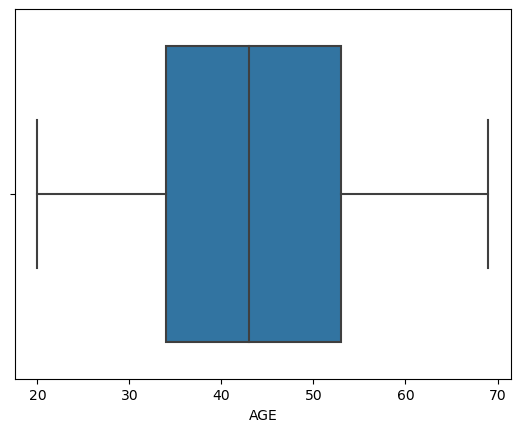

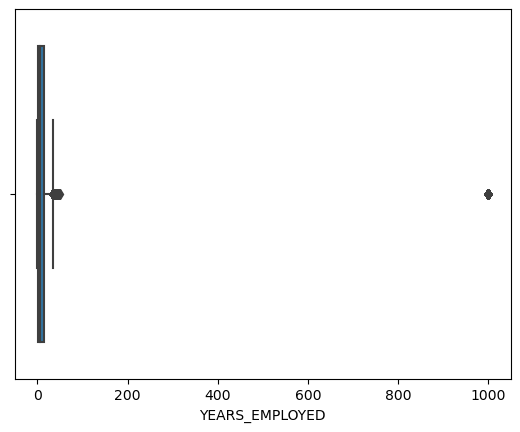

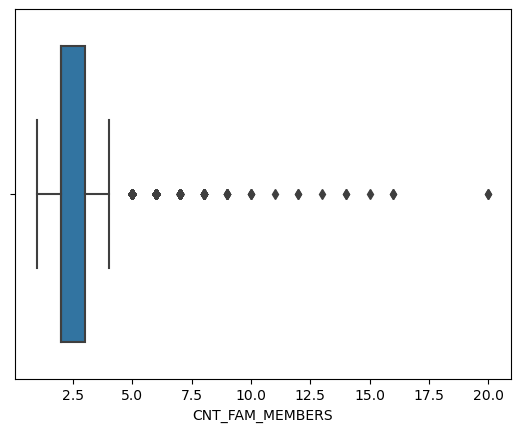

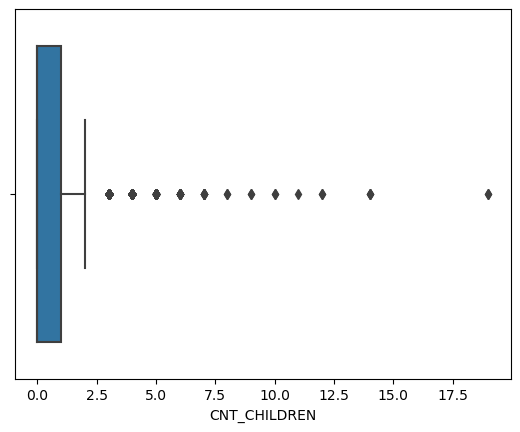

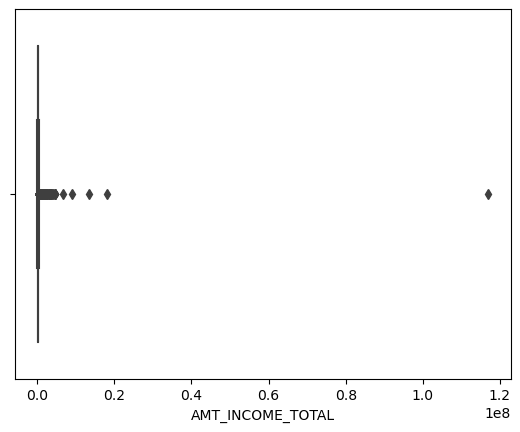

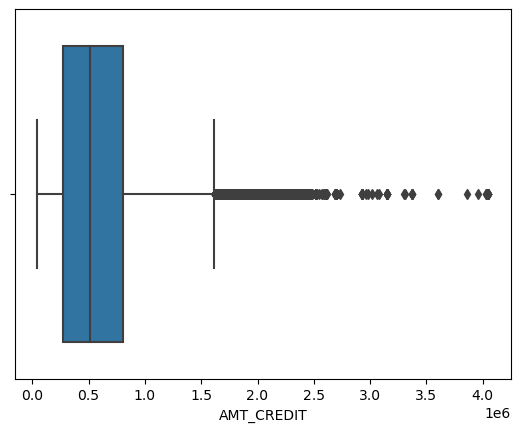

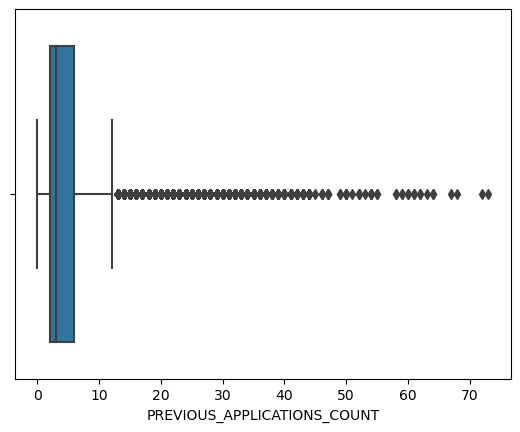

In [208]:
## CHECK FOR OUTLIERS USING BOXPLOT
i = 0
for col in ['AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'PREVIOUS_APPLICATIONS_COUNT']:
    plt.figure(i)
    sns.boxplot(x=application_data[col])
    i+=1

In [225]:
application_data[application_data['PREVIOUS_APPLICATIONS_COUNT'] > 50]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP,PREVIOUS_APPLICATIONS_COUNT,AMT_INCOME_GROUP,AMT_CREDIT_GROUP
9373,110899,1,Cash loans,F,N,Y,1,157500.0,579942.0,45949.5,...,0.0,1.0,4.0,39,30 - 40,3,Fresh,58.0,100K - 200K,500K Above
28414,133023,1,Cash loans,F,N,Y,0,112500.0,277969.5,17892.0,...,0.0,0.0,7.0,56,50 - 60,14,10 years,60.0,100K - 200K,200K - 300K
63534,173680,0,Cash loans,M,Y,Y,0,180000.0,450000.0,17140.5,...,1.0,0.0,4.0,30,20 - 30,1,Fresh,72.0,100K - 200K,400K - 500K
77039,189332,0,Cash loans,F,Y,Y,0,292500.0,495000.0,39240.0,...,0.0,1.0,12.0,30,20 - 30,2,Fresh,52.0,200K - 300K,400K - 500K
84775,198355,0,Cash loans,F,N,N,0,135000.0,288000.0,8253.0,...,0.0,0.0,7.0,27,20 - 30,8,5 years,63.0,100K - 200K,200K - 300K
90805,205430,0,Cash loans,M,N,Y,0,180000.0,247275.0,16357.5,...,0.0,4.0,8.0,32,30 - 40,1,Fresh,55.0,100K - 200K,200K - 300K
91953,206783,0,Cash loans,M,N,Y,0,427500.0,453514.5,27535.5,...,0.0,2.0,17.0,40,30 - 40,1000,50 years and above,67.0,400K - 500K,400K - 500K
92023,206862,0,Cash loans,M,N,Y,0,225000.0,545040.0,25537.5,...,0.0,0.0,7.0,42,40 - 50,11,10 years,60.0,200K - 300K,500K Above
116554,235163,1,Cash loans,M,Y,Y,2,180000.0,619254.0,29920.5,...,0.0,0.0,2.0,33,30 - 40,2,Fresh,58.0,100K - 200K,500K Above
119226,238250,0,Cash loans,F,N,Y,0,157500.0,1575000.0,47754.0,...,0.0,3.0,7.0,59,50 - 60,1000,50 years and above,61.0,100K - 200K,NaN


In [224]:
application_data['PREVIOUS_APPLICATIONS_COUNT'].describe()

count    307511.000000
mean          4.597237
std           4.180015
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          73.000000
Name: PREVIOUS_APPLICATIONS_COUNT, dtype: float64

In [219]:
previous_application[previous_application['SK_ID_CURR'] == 110899]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
111470,1583267,110899,Cash loans,26574.255,225000.0,289732.5,225000.0,WEDNESDAY,13,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,high,Cash Street: high
144415,2460830,110899,Cash loans,27117.810,450000.0,645048.0,450000.0,THURSDAY,13,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,48.0,middle,Cash Street: middle
167797,1559584,110899,Cash loans,30890.520,922500.0,1056447.0,922500.0,THURSDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,60.0,low_normal,Cash X-Sell: low
167798,1202721,110899,Revolving loans,NaN,0.0,0.0,NaN,TUESDAY,7,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street
179163,2520653,110899,Cash loans,33150.780,990000.0,1133748.0,990000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,60.0,low_normal,Cash X-Sell: low
179164,1559045,110899,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,10,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
179165,2129211,110899,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,7,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
191312,2739089,110899,Revolving loans,NaN,0.0,0.0,NaN,WEDNESDAY,8,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street
191313,2129481,110899,Cash loans,13935.735,193500.0,249565.5,193500.0,SUNDAY,12,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low
194320,2601315,110899,Consumer loans,5692.320,32220.0,32220.0,32220.0,WEDNESDAY,10,Y,...,Repeater,Consumer Electronics,POS,XNA,Regional / Local,264,Consumer electronics,6.0,low_normal,POS household with interest


In [211]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [212]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
## CHECK FOR OUTLIERS USING BOXPLOT
i = 0
for col in ['AMT_APPLICATION', 'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'PREVIOUS_APPLICATIONS_COUNT']:
    plt.figure(i)
    sns.boxplot(x=application_data[col])
    i+=1

In [228]:
previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts(dropna=False,normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

No useful information here in Purpose

In [230]:
previous_application['NAME_CONTRACT_STATUS'].value_counts(dropna=False,normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [229]:
previous_application.to_csv('previous_application.csv')

In [231]:
len(previous_application)

1670214

In [233]:
previous_application['DAYS_DECISION_POSITIVE'] = abs(previous_application['DAYS_DECISION'])

In [234]:
previous_application['DAYS_DECISION_POSITIVE'].describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION_POSITIVE, dtype: float64

X:\Users\Ahmad_Rao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_DECISION_POSITIVE'>

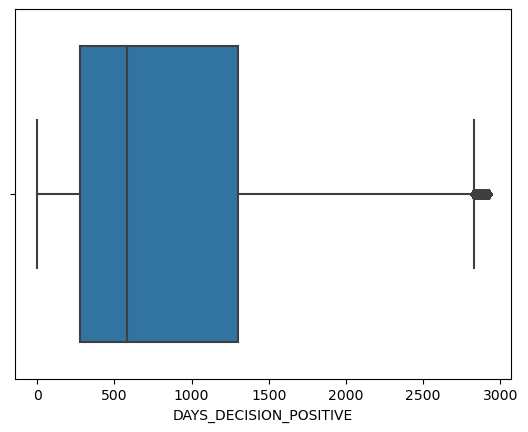

In [236]:
sns.boxplot(previous_application['DAYS_DECISION_POSITIVE'])

In [ ]:
No Anomaly found in Age
Years Employed seems to have incorrect entry
Count of Children/family members is 20, which can be true
Previous Applications Count is more than 70 for an applicant which seem to be an anomaly.

# Bi-variate Analysis

In [164]:
for column in application_data.columns:
    print('----------------', column, '-------------')
    for value in application_data[column].unique():
        print('*******',value,'*********')
        print(application_data[application_data[column] == value]['TARGET'].value_counts())

---------------- SK_ID_CURR -------------
******* 100002 *********
1    1
Name: TARGET, dtype: int64
******* 100003 *********
0    1
Name: TARGET, dtype: int64
******* 100004 *********
0    1
Name: TARGET, dtype: int64
******* 100006 *********
0    1
Name: TARGET, dtype: int64
******* 100007 *********
0    1
Name: TARGET, dtype: int64
******* 100008 *********
0    1
Name: TARGET, dtype: int64
******* 100009 *********
0    1
Name: TARGET, dtype: int64
******* 100010 *********
0    1
Name: TARGET, dtype: int64
******* 100011 *********
0    1
Name: TARGET, dtype: int64
******* 100012 *********
0    1
Name: TARGET, dtype: int64
******* 100014 *********
0    1
Name: TARGET, dtype: int64
******* 100015 *********
0    1
Name: TARGET, dtype: int64
******* 100016 *********
0    1
Name: TARGET, dtype: int64
******* 100017 *********
0    1
Name: TARGET, dtype: int64
******* 100018 *********
0    1
Name: TARGET, dtype: int64
******* 100019 *********
0    1
Name: TARGET, dtype: int64
******* 100020

0    1
Name: TARGET, dtype: int64
******* 100196 *********
0    1
Name: TARGET, dtype: int64
******* 100197 *********
0    1
Name: TARGET, dtype: int64
******* 100198 *********
0    1
Name: TARGET, dtype: int64
******* 100199 *********
0    1
Name: TARGET, dtype: int64
******* 100200 *********
0    1
Name: TARGET, dtype: int64
******* 100201 *********
0    1
Name: TARGET, dtype: int64
******* 100202 *********
0    1
Name: TARGET, dtype: int64
******* 100203 *********
0    1
Name: TARGET, dtype: int64
******* 100204 *********
0    1
Name: TARGET, dtype: int64
******* 100205 *********
0    1
Name: TARGET, dtype: int64
******* 100206 *********
0    1
Name: TARGET, dtype: int64
******* 100207 *********
0    1
Name: TARGET, dtype: int64
******* 100208 *********
0    1
Name: TARGET, dtype: int64
******* 100209 *********
1    1
Name: TARGET, dtype: int64
******* 100210 *********
0    1
Name: TARGET, dtype: int64
******* 100211 *********
0    1
Name: TARGET, dtype: int64
******* 100213 *******

0    1
Name: TARGET, dtype: int64
******* 100398 *********
0    1
Name: TARGET, dtype: int64
******* 100400 *********
0    1
Name: TARGET, dtype: int64
******* 100401 *********
1    1
Name: TARGET, dtype: int64
******* 100402 *********
0    1
Name: TARGET, dtype: int64
******* 100403 *********
0    1
Name: TARGET, dtype: int64
******* 100405 *********
0    1
Name: TARGET, dtype: int64
******* 100406 *********
0    1
Name: TARGET, dtype: int64
******* 100407 *********
0    1
Name: TARGET, dtype: int64
******* 100408 *********
0    1
Name: TARGET, dtype: int64
******* 100409 *********
0    1
Name: TARGET, dtype: int64
******* 100410 *********
0    1
Name: TARGET, dtype: int64
******* 100411 *********
0    1
Name: TARGET, dtype: int64
******* 100412 *********
0    1
Name: TARGET, dtype: int64
******* 100413 *********
0    1
Name: TARGET, dtype: int64
******* 100414 *********
0    1
Name: TARGET, dtype: int64
******* 100415 *********
0    1
Name: TARGET, dtype: int64
******* 100417 *******

0    1
Name: TARGET, dtype: int64
******* 100593 *********
0    1
Name: TARGET, dtype: int64
******* 100594 *********
0    1
Name: TARGET, dtype: int64
******* 100595 *********
0    1
Name: TARGET, dtype: int64
******* 100596 *********
0    1
Name: TARGET, dtype: int64
******* 100597 *********
0    1
Name: TARGET, dtype: int64
******* 100598 *********
0    1
Name: TARGET, dtype: int64
******* 100599 *********
0    1
Name: TARGET, dtype: int64
******* 100600 *********
0    1
Name: TARGET, dtype: int64
******* 100601 *********
0    1
Name: TARGET, dtype: int64
******* 100603 *********
0    1
Name: TARGET, dtype: int64
******* 100604 *********
0    1
Name: TARGET, dtype: int64
******* 100605 *********
0    1
Name: TARGET, dtype: int64
******* 100606 *********
0    1
Name: TARGET, dtype: int64
******* 100608 *********
0    1
Name: TARGET, dtype: int64
******* 100609 *********
0    1
Name: TARGET, dtype: int64
******* 100610 *********
0    1
Name: TARGET, dtype: int64
******* 100611 *******

0    1
Name: TARGET, dtype: int64
******* 100802 *********
0    1
Name: TARGET, dtype: int64
******* 100803 *********
0    1
Name: TARGET, dtype: int64
******* 100804 *********
0    1
Name: TARGET, dtype: int64
******* 100805 *********
0    1
Name: TARGET, dtype: int64
******* 100806 *********
0    1
Name: TARGET, dtype: int64
******* 100807 *********
0    1
Name: TARGET, dtype: int64
******* 100808 *********
1    1
Name: TARGET, dtype: int64
******* 100809 *********
0    1
Name: TARGET, dtype: int64
******* 100810 *********
0    1
Name: TARGET, dtype: int64
******* 100811 *********
0    1
Name: TARGET, dtype: int64
******* 100812 *********
0    1
Name: TARGET, dtype: int64
******* 100813 *********
0    1
Name: TARGET, dtype: int64
******* 100814 *********
0    1
Name: TARGET, dtype: int64
******* 100815 *********
0    1
Name: TARGET, dtype: int64
******* 100816 *********
1    1
Name: TARGET, dtype: int64
******* 100817 *********
0    1
Name: TARGET, dtype: int64
******* 100818 *******

0    1
Name: TARGET, dtype: int64
******* 100981 *********
0    1
Name: TARGET, dtype: int64
******* 100985 *********
0    1
Name: TARGET, dtype: int64
******* 100986 *********
0    1
Name: TARGET, dtype: int64
******* 100988 *********
0    1
Name: TARGET, dtype: int64
******* 100989 *********
0    1
Name: TARGET, dtype: int64
******* 100990 *********
0    1
Name: TARGET, dtype: int64
******* 100991 *********
0    1
Name: TARGET, dtype: int64
******* 100992 *********
1    1
Name: TARGET, dtype: int64
******* 100993 *********
0    1
Name: TARGET, dtype: int64
******* 100994 *********
0    1
Name: TARGET, dtype: int64
******* 100995 *********
0    1
Name: TARGET, dtype: int64
******* 100996 *********
1    1
Name: TARGET, dtype: int64
******* 100999 *********
0    1
Name: TARGET, dtype: int64
******* 101000 *********
0    1
Name: TARGET, dtype: int64
******* 101001 *********
0    1
Name: TARGET, dtype: int64
******* 101003 *********
0    1
Name: TARGET, dtype: int64
******* 101004 *******

0    1
Name: TARGET, dtype: int64
******* 101192 *********
0    1
Name: TARGET, dtype: int64
******* 101195 *********
0    1
Name: TARGET, dtype: int64
******* 101196 *********
0    1
Name: TARGET, dtype: int64
******* 101197 *********
1    1
Name: TARGET, dtype: int64
******* 101199 *********
0    1
Name: TARGET, dtype: int64
******* 101201 *********
1    1
Name: TARGET, dtype: int64
******* 101202 *********
0    1
Name: TARGET, dtype: int64
******* 101203 *********
0    1
Name: TARGET, dtype: int64
******* 101205 *********
0    1
Name: TARGET, dtype: int64
******* 101206 *********
0    1
Name: TARGET, dtype: int64
******* 101207 *********
0    1
Name: TARGET, dtype: int64
******* 101208 *********
0    1
Name: TARGET, dtype: int64
******* 101209 *********
0    1
Name: TARGET, dtype: int64
******* 101210 *********
0    1
Name: TARGET, dtype: int64
******* 101212 *********
0    1
Name: TARGET, dtype: int64
******* 101214 *********
0    1
Name: TARGET, dtype: int64
******* 101215 *******

0    1
Name: TARGET, dtype: int64
******* 101443 *********
0    1
Name: TARGET, dtype: int64
******* 101444 *********
1    1
Name: TARGET, dtype: int64
******* 101445 *********
0    1
Name: TARGET, dtype: int64
******* 101446 *********
0    1
Name: TARGET, dtype: int64
******* 101447 *********
0    1
Name: TARGET, dtype: int64
******* 101450 *********
0    1
Name: TARGET, dtype: int64
******* 101451 *********
0    1
Name: TARGET, dtype: int64
******* 101452 *********
0    1
Name: TARGET, dtype: int64
******* 101453 *********
0    1
Name: TARGET, dtype: int64
******* 101454 *********
0    1
Name: TARGET, dtype: int64
******* 101455 *********
0    1
Name: TARGET, dtype: int64
******* 101456 *********
0    1
Name: TARGET, dtype: int64
******* 101457 *********
0    1
Name: TARGET, dtype: int64
******* 101458 *********
1    1
Name: TARGET, dtype: int64
******* 101459 *********
0    1
Name: TARGET, dtype: int64
******* 101460 *********
0    1
Name: TARGET, dtype: int64
******* 101461 *******

0    1
Name: TARGET, dtype: int64
******* 101651 *********
0    1
Name: TARGET, dtype: int64
******* 101652 *********
0    1
Name: TARGET, dtype: int64
******* 101653 *********
0    1
Name: TARGET, dtype: int64
******* 101654 *********
0    1
Name: TARGET, dtype: int64
******* 101655 *********
0    1
Name: TARGET, dtype: int64
******* 101656 *********
0    1
Name: TARGET, dtype: int64
******* 101657 *********
0    1
Name: TARGET, dtype: int64
******* 101658 *********
0    1
Name: TARGET, dtype: int64
******* 101659 *********
0    1
Name: TARGET, dtype: int64
******* 101660 *********
0    1
Name: TARGET, dtype: int64
******* 101661 *********
0    1
Name: TARGET, dtype: int64
******* 101662 *********
0    1
Name: TARGET, dtype: int64
******* 101663 *********
0    1
Name: TARGET, dtype: int64
******* 101664 *********
0    1
Name: TARGET, dtype: int64
******* 101666 *********
0    1
Name: TARGET, dtype: int64
******* 101668 *********
0    1
Name: TARGET, dtype: int64
******* 101670 *******

0    1
Name: TARGET, dtype: int64
******* 101844 *********
0    1
Name: TARGET, dtype: int64
******* 101845 *********
0    1
Name: TARGET, dtype: int64
******* 101846 *********
0    1
Name: TARGET, dtype: int64
******* 101847 *********
0    1
Name: TARGET, dtype: int64
******* 101848 *********
0    1
Name: TARGET, dtype: int64
******* 101849 *********
0    1
Name: TARGET, dtype: int64
******* 101850 *********
0    1
Name: TARGET, dtype: int64
******* 101851 *********
0    1
Name: TARGET, dtype: int64
******* 101852 *********
0    1
Name: TARGET, dtype: int64
******* 101853 *********
0    1
Name: TARGET, dtype: int64
******* 101854 *********
0    1
Name: TARGET, dtype: int64
******* 101855 *********
0    1
Name: TARGET, dtype: int64
******* 101856 *********
0    1
Name: TARGET, dtype: int64
******* 101857 *********
0    1
Name: TARGET, dtype: int64
******* 101858 *********
0    1
Name: TARGET, dtype: int64
******* 101859 *********
1    1
Name: TARGET, dtype: int64
******* 101860 *******

1    1
Name: TARGET, dtype: int64
******* 102021 *********
0    1
Name: TARGET, dtype: int64
******* 102022 *********
0    1
Name: TARGET, dtype: int64
******* 102023 *********
0    1
Name: TARGET, dtype: int64
******* 102024 *********
1    1
Name: TARGET, dtype: int64
******* 102025 *********
1    1
Name: TARGET, dtype: int64
******* 102026 *********
0    1
Name: TARGET, dtype: int64
******* 102027 *********
0    1
Name: TARGET, dtype: int64
******* 102028 *********
1    1
Name: TARGET, dtype: int64
******* 102030 *********
0    1
Name: TARGET, dtype: int64
******* 102031 *********
1    1
Name: TARGET, dtype: int64
******* 102032 *********
0    1
Name: TARGET, dtype: int64
******* 102033 *********
0    1
Name: TARGET, dtype: int64
******* 102034 *********
0    1
Name: TARGET, dtype: int64
******* 102035 *********
0    1
Name: TARGET, dtype: int64
******* 102036 *********
0    1
Name: TARGET, dtype: int64
******* 102037 *********
0    1
Name: TARGET, dtype: int64
******* 102038 *******

0    1
Name: TARGET, dtype: int64
******* 102234 *********
0    1
Name: TARGET, dtype: int64
******* 102235 *********
1    1
Name: TARGET, dtype: int64
******* 102236 *********
0    1
Name: TARGET, dtype: int64
******* 102237 *********
0    1
Name: TARGET, dtype: int64
******* 102239 *********
0    1
Name: TARGET, dtype: int64
******* 102240 *********
0    1
Name: TARGET, dtype: int64
******* 102241 *********
0    1
Name: TARGET, dtype: int64
******* 102242 *********
0    1
Name: TARGET, dtype: int64
******* 102243 *********
0    1
Name: TARGET, dtype: int64
******* 102244 *********
0    1
Name: TARGET, dtype: int64
******* 102245 *********
0    1
Name: TARGET, dtype: int64
******* 102246 *********
0    1
Name: TARGET, dtype: int64
******* 102247 *********
0    1
Name: TARGET, dtype: int64
******* 102249 *********
0    1
Name: TARGET, dtype: int64
******* 102250 *********
0    1
Name: TARGET, dtype: int64
******* 102251 *********
0    1
Name: TARGET, dtype: int64
******* 102253 *******

0    1
Name: TARGET, dtype: int64
******* 102410 *********
0    1
Name: TARGET, dtype: int64
******* 102411 *********
0    1
Name: TARGET, dtype: int64
******* 102412 *********
0    1
Name: TARGET, dtype: int64
******* 102417 *********
0    1
Name: TARGET, dtype: int64
******* 102418 *********
0    1
Name: TARGET, dtype: int64
******* 102419 *********
0    1
Name: TARGET, dtype: int64
******* 102420 *********
0    1
Name: TARGET, dtype: int64
******* 102421 *********
0    1
Name: TARGET, dtype: int64
******* 102422 *********
0    1
Name: TARGET, dtype: int64
******* 102423 *********
0    1
Name: TARGET, dtype: int64
******* 102424 *********
0    1
Name: TARGET, dtype: int64
******* 102425 *********
0    1
Name: TARGET, dtype: int64
******* 102426 *********
0    1
Name: TARGET, dtype: int64
******* 102427 *********
0    1
Name: TARGET, dtype: int64
******* 102428 *********
0    1
Name: TARGET, dtype: int64
******* 102429 *********
0    1
Name: TARGET, dtype: int64
******* 102430 *******

0    1
Name: TARGET, dtype: int64
******* 102608 *********
1    1
Name: TARGET, dtype: int64
******* 102609 *********
0    1
Name: TARGET, dtype: int64
******* 102610 *********
0    1
Name: TARGET, dtype: int64
******* 102611 *********
0    1
Name: TARGET, dtype: int64
******* 102612 *********
0    1
Name: TARGET, dtype: int64
******* 102613 *********
0    1
Name: TARGET, dtype: int64
******* 102615 *********
0    1
Name: TARGET, dtype: int64
******* 102616 *********
0    1
Name: TARGET, dtype: int64
******* 102618 *********
0    1
Name: TARGET, dtype: int64
******* 102619 *********
0    1
Name: TARGET, dtype: int64
******* 102620 *********
0    1
Name: TARGET, dtype: int64
******* 102621 *********
0    1
Name: TARGET, dtype: int64
******* 102622 *********
0    1
Name: TARGET, dtype: int64
******* 102623 *********
0    1
Name: TARGET, dtype: int64
******* 102624 *********
1    1
Name: TARGET, dtype: int64
******* 102625 *********
0    1
Name: TARGET, dtype: int64
******* 102626 *******

0    1
Name: TARGET, dtype: int64
******* 102801 *********
0    1
Name: TARGET, dtype: int64
******* 102802 *********
0    1
Name: TARGET, dtype: int64
******* 102803 *********
0    1
Name: TARGET, dtype: int64
******* 102804 *********
0    1
Name: TARGET, dtype: int64
******* 102805 *********
0    1
Name: TARGET, dtype: int64
******* 102806 *********
0    1
Name: TARGET, dtype: int64
******* 102807 *********
0    1
Name: TARGET, dtype: int64
******* 102808 *********
0    1
Name: TARGET, dtype: int64
******* 102809 *********
1    1
Name: TARGET, dtype: int64
******* 102810 *********
0    1
Name: TARGET, dtype: int64
******* 102811 *********
0    1
Name: TARGET, dtype: int64
******* 102812 *********
0    1
Name: TARGET, dtype: int64
******* 102813 *********
0    1
Name: TARGET, dtype: int64
******* 102814 *********
0    1
Name: TARGET, dtype: int64
******* 102815 *********
0    1
Name: TARGET, dtype: int64
******* 102816 *********
0    1
Name: TARGET, dtype: int64
******* 102817 *******

0    1
Name: TARGET, dtype: int64
******* 103026 *********
0    1
Name: TARGET, dtype: int64
******* 103027 *********
0    1
Name: TARGET, dtype: int64
******* 103028 *********
0    1
Name: TARGET, dtype: int64
******* 103030 *********
0    1
Name: TARGET, dtype: int64
******* 103031 *********
0    1
Name: TARGET, dtype: int64
******* 103032 *********
0    1
Name: TARGET, dtype: int64
******* 103033 *********
0    1
Name: TARGET, dtype: int64
******* 103034 *********
0    1
Name: TARGET, dtype: int64
******* 103035 *********
0    1
Name: TARGET, dtype: int64
******* 103036 *********
0    1
Name: TARGET, dtype: int64
******* 103037 *********
0    1
Name: TARGET, dtype: int64
******* 103038 *********
0    1
Name: TARGET, dtype: int64
******* 103039 *********
0    1
Name: TARGET, dtype: int64
******* 103040 *********
0    1
Name: TARGET, dtype: int64
******* 103041 *********
0    1
Name: TARGET, dtype: int64
******* 103042 *********
0    1
Name: TARGET, dtype: int64
******* 103043 *******

1    1
Name: TARGET, dtype: int64
******* 103197 *********
0    1
Name: TARGET, dtype: int64
******* 103198 *********
0    1
Name: TARGET, dtype: int64
******* 103199 *********
0    1
Name: TARGET, dtype: int64
******* 103200 *********
0    1
Name: TARGET, dtype: int64
******* 103201 *********
0    1
Name: TARGET, dtype: int64
******* 103202 *********
0    1
Name: TARGET, dtype: int64
******* 103203 *********
0    1
Name: TARGET, dtype: int64
******* 103204 *********
1    1
Name: TARGET, dtype: int64
******* 103205 *********
1    1
Name: TARGET, dtype: int64
******* 103207 *********
1    1
Name: TARGET, dtype: int64
******* 103208 *********
0    1
Name: TARGET, dtype: int64
******* 103209 *********
0    1
Name: TARGET, dtype: int64
******* 103210 *********
0    1
Name: TARGET, dtype: int64
******* 103211 *********
0    1
Name: TARGET, dtype: int64
******* 103212 *********
0    1
Name: TARGET, dtype: int64
******* 103213 *********
0    1
Name: TARGET, dtype: int64
******* 103214 *******

1    1
Name: TARGET, dtype: int64
******* 103390 *********
1    1
Name: TARGET, dtype: int64
******* 103391 *********
0    1
Name: TARGET, dtype: int64
******* 103392 *********
0    1
Name: TARGET, dtype: int64
******* 103393 *********
0    1
Name: TARGET, dtype: int64
******* 103394 *********
0    1
Name: TARGET, dtype: int64
******* 103395 *********
0    1
Name: TARGET, dtype: int64
******* 103396 *********
0    1
Name: TARGET, dtype: int64
******* 103397 *********
0    1
Name: TARGET, dtype: int64
******* 103399 *********
0    1
Name: TARGET, dtype: int64
******* 103400 *********
0    1
Name: TARGET, dtype: int64
******* 103401 *********
0    1
Name: TARGET, dtype: int64
******* 103402 *********
0    1
Name: TARGET, dtype: int64
******* 103403 *********
0    1
Name: TARGET, dtype: int64
******* 103405 *********
1    1
Name: TARGET, dtype: int64
******* 103406 *********
0    1
Name: TARGET, dtype: int64
******* 103407 *********
1    1
Name: TARGET, dtype: int64
******* 103409 *******

0    1
Name: TARGET, dtype: int64
******* 103606 *********
0    1
Name: TARGET, dtype: int64
******* 103607 *********
0    1
Name: TARGET, dtype: int64
******* 103608 *********
0    1
Name: TARGET, dtype: int64
******* 103610 *********
0    1
Name: TARGET, dtype: int64
******* 103611 *********
0    1
Name: TARGET, dtype: int64
******* 103612 *********
0    1
Name: TARGET, dtype: int64
******* 103616 *********
0    1
Name: TARGET, dtype: int64
******* 103617 *********
0    1
Name: TARGET, dtype: int64
******* 103618 *********
0    1
Name: TARGET, dtype: int64
******* 103619 *********
0    1
Name: TARGET, dtype: int64
******* 103620 *********
0    1
Name: TARGET, dtype: int64
******* 103621 *********
0    1
Name: TARGET, dtype: int64
******* 103622 *********
0    1
Name: TARGET, dtype: int64
******* 103623 *********
0    1
Name: TARGET, dtype: int64
******* 103626 *********
0    1
Name: TARGET, dtype: int64
******* 103627 *********
0    1
Name: TARGET, dtype: int64
******* 103630 *******

0    1
Name: TARGET, dtype: int64
******* 103787 *********
0    1
Name: TARGET, dtype: int64
******* 103788 *********
0    1
Name: TARGET, dtype: int64
******* 103789 *********
0    1
Name: TARGET, dtype: int64
******* 103790 *********
0    1
Name: TARGET, dtype: int64
******* 103791 *********
0    1
Name: TARGET, dtype: int64
******* 103792 *********
0    1
Name: TARGET, dtype: int64
******* 103793 *********
1    1
Name: TARGET, dtype: int64
******* 103794 *********
0    1
Name: TARGET, dtype: int64
******* 103795 *********
0    1
Name: TARGET, dtype: int64
******* 103796 *********
0    1
Name: TARGET, dtype: int64
******* 103797 *********
0    1
Name: TARGET, dtype: int64
******* 103798 *********
0    1
Name: TARGET, dtype: int64
******* 103799 *********
1    1
Name: TARGET, dtype: int64
******* 103800 *********
0    1
Name: TARGET, dtype: int64
******* 103801 *********
0    1
Name: TARGET, dtype: int64
******* 103802 *********
0    1
Name: TARGET, dtype: int64
******* 103803 *******

0    1
Name: TARGET, dtype: int64
******* 104055 *********
0    1
Name: TARGET, dtype: int64
******* 104056 *********
0    1
Name: TARGET, dtype: int64
******* 104057 *********
1    1
Name: TARGET, dtype: int64
******* 104059 *********
0    1
Name: TARGET, dtype: int64
******* 104060 *********
0    1
Name: TARGET, dtype: int64
******* 104061 *********
0    1
Name: TARGET, dtype: int64
******* 104062 *********
0    1
Name: TARGET, dtype: int64
******* 104064 *********
0    1
Name: TARGET, dtype: int64
******* 104065 *********
0    1
Name: TARGET, dtype: int64
******* 104067 *********
0    1
Name: TARGET, dtype: int64
******* 104068 *********
0    1
Name: TARGET, dtype: int64
******* 104069 *********
0    1
Name: TARGET, dtype: int64
******* 104070 *********
1    1
Name: TARGET, dtype: int64
******* 104071 *********
0    1
Name: TARGET, dtype: int64
******* 104072 *********
0    1
Name: TARGET, dtype: int64
******* 104073 *********
0    1
Name: TARGET, dtype: int64
******* 104074 *******

0    1
Name: TARGET, dtype: int64
******* 104249 *********
0    1
Name: TARGET, dtype: int64
******* 104250 *********
0    1
Name: TARGET, dtype: int64
******* 104251 *********
0    1
Name: TARGET, dtype: int64
******* 104252 *********
0    1
Name: TARGET, dtype: int64
******* 104253 *********
0    1
Name: TARGET, dtype: int64
******* 104254 *********
0    1
Name: TARGET, dtype: int64
******* 104255 *********
0    1
Name: TARGET, dtype: int64
******* 104256 *********
0    1
Name: TARGET, dtype: int64
******* 104258 *********
0    1
Name: TARGET, dtype: int64
******* 104259 *********
0    1
Name: TARGET, dtype: int64
******* 104260 *********
0    1
Name: TARGET, dtype: int64
******* 104261 *********
0    1
Name: TARGET, dtype: int64
******* 104262 *********
1    1
Name: TARGET, dtype: int64
******* 104263 *********
0    1
Name: TARGET, dtype: int64
******* 104264 *********
0    1
Name: TARGET, dtype: int64
******* 104265 *********
0    1
Name: TARGET, dtype: int64
******* 104266 *******

0    1
Name: TARGET, dtype: int64
******* 104449 *********
0    1
Name: TARGET, dtype: int64
******* 104450 *********
0    1
Name: TARGET, dtype: int64
******* 104451 *********
0    1
Name: TARGET, dtype: int64
******* 104452 *********
0    1
Name: TARGET, dtype: int64
******* 104453 *********
0    1
Name: TARGET, dtype: int64
******* 104454 *********
0    1
Name: TARGET, dtype: int64
******* 104455 *********
0    1
Name: TARGET, dtype: int64
******* 104456 *********
0    1
Name: TARGET, dtype: int64
******* 104457 *********
0    1
Name: TARGET, dtype: int64
******* 104459 *********
0    1
Name: TARGET, dtype: int64
******* 104461 *********
0    1
Name: TARGET, dtype: int64
******* 104462 *********
0    1
Name: TARGET, dtype: int64
******* 104463 *********
0    1
Name: TARGET, dtype: int64
******* 104464 *********
0    1
Name: TARGET, dtype: int64
******* 104465 *********
0    1
Name: TARGET, dtype: int64
******* 104467 *********
0    1
Name: TARGET, dtype: int64
******* 104468 *******

1    1
Name: TARGET, dtype: int64
******* 104678 *********
0    1
Name: TARGET, dtype: int64
******* 104679 *********
0    1
Name: TARGET, dtype: int64
******* 104680 *********
0    1
Name: TARGET, dtype: int64
******* 104681 *********
0    1
Name: TARGET, dtype: int64
******* 104682 *********
0    1
Name: TARGET, dtype: int64
******* 104683 *********
0    1
Name: TARGET, dtype: int64
******* 104684 *********
0    1
Name: TARGET, dtype: int64
******* 104686 *********
0    1
Name: TARGET, dtype: int64
******* 104687 *********
0    1
Name: TARGET, dtype: int64
******* 104688 *********
0    1
Name: TARGET, dtype: int64
******* 104689 *********
0    1
Name: TARGET, dtype: int64
******* 104690 *********
0    1
Name: TARGET, dtype: int64
******* 104692 *********
0    1
Name: TARGET, dtype: int64
******* 104693 *********
0    1
Name: TARGET, dtype: int64
******* 104694 *********
0    1
Name: TARGET, dtype: int64
******* 104695 *********
0    1
Name: TARGET, dtype: int64
******* 104697 *******

0    1
Name: TARGET, dtype: int64
******* 104900 *********
0    1
Name: TARGET, dtype: int64
******* 104901 *********
0    1
Name: TARGET, dtype: int64
******* 104902 *********
0    1
Name: TARGET, dtype: int64
******* 104903 *********
0    1
Name: TARGET, dtype: int64
******* 104904 *********
0    1
Name: TARGET, dtype: int64
******* 104905 *********
0    1
Name: TARGET, dtype: int64
******* 104908 *********
0    1
Name: TARGET, dtype: int64
******* 104909 *********
0    1
Name: TARGET, dtype: int64
******* 104910 *********
0    1
Name: TARGET, dtype: int64
******* 104911 *********
0    1
Name: TARGET, dtype: int64
******* 104912 *********
0    1
Name: TARGET, dtype: int64
******* 104914 *********
0    1
Name: TARGET, dtype: int64
******* 104915 *********
0    1
Name: TARGET, dtype: int64
******* 104917 *********
1    1
Name: TARGET, dtype: int64
******* 104918 *********
1    1
Name: TARGET, dtype: int64
******* 104919 *********
0    1
Name: TARGET, dtype: int64
******* 104920 *******

0    1
Name: TARGET, dtype: int64
******* 105108 *********
0    1
Name: TARGET, dtype: int64
******* 105109 *********
0    1
Name: TARGET, dtype: int64
******* 105110 *********
0    1
Name: TARGET, dtype: int64
******* 105111 *********
0    1
Name: TARGET, dtype: int64
******* 105112 *********
0    1
Name: TARGET, dtype: int64
******* 105113 *********
1    1
Name: TARGET, dtype: int64
******* 105114 *********
0    1
Name: TARGET, dtype: int64
******* 105115 *********
1    1
Name: TARGET, dtype: int64
******* 105116 *********
0    1
Name: TARGET, dtype: int64
******* 105117 *********
1    1
Name: TARGET, dtype: int64
******* 105118 *********
0    1
Name: TARGET, dtype: int64
******* 105119 *********
0    1
Name: TARGET, dtype: int64
******* 105120 *********
0    1
Name: TARGET, dtype: int64
******* 105121 *********
0    1
Name: TARGET, dtype: int64
******* 105122 *********
0    1
Name: TARGET, dtype: int64
******* 105123 *********
0    1
Name: TARGET, dtype: int64
******* 105124 *******

1    1
Name: TARGET, dtype: int64
******* 105364 *********
0    1
Name: TARGET, dtype: int64
******* 105365 *********
0    1
Name: TARGET, dtype: int64
******* 105368 *********
0    1
Name: TARGET, dtype: int64
******* 105369 *********
0    1
Name: TARGET, dtype: int64
******* 105371 *********
0    1
Name: TARGET, dtype: int64
******* 105372 *********
0    1
Name: TARGET, dtype: int64
******* 105373 *********
0    1
Name: TARGET, dtype: int64
******* 105374 *********
0    1
Name: TARGET, dtype: int64
******* 105375 *********
0    1
Name: TARGET, dtype: int64
******* 105376 *********
0    1
Name: TARGET, dtype: int64
******* 105378 *********
0    1
Name: TARGET, dtype: int64
******* 105379 *********
1    1
Name: TARGET, dtype: int64
******* 105380 *********
0    1
Name: TARGET, dtype: int64
******* 105381 *********
0    1
Name: TARGET, dtype: int64
******* 105382 *********
0    1
Name: TARGET, dtype: int64
******* 105383 *********
1    1
Name: TARGET, dtype: int64
******* 105384 *******

0    1
Name: TARGET, dtype: int64
******* 105562 *********
0    1
Name: TARGET, dtype: int64
******* 105563 *********
0    1
Name: TARGET, dtype: int64
******* 105564 *********
0    1
Name: TARGET, dtype: int64
******* 105565 *********
0    1
Name: TARGET, dtype: int64
******* 105566 *********
0    1
Name: TARGET, dtype: int64
******* 105567 *********
0    1
Name: TARGET, dtype: int64
******* 105568 *********
0    1
Name: TARGET, dtype: int64
******* 105569 *********
0    1
Name: TARGET, dtype: int64
******* 105570 *********
0    1
Name: TARGET, dtype: int64
******* 105571 *********
0    1
Name: TARGET, dtype: int64
******* 105572 *********
0    1
Name: TARGET, dtype: int64
******* 105573 *********
0    1
Name: TARGET, dtype: int64
******* 105575 *********
0    1
Name: TARGET, dtype: int64
******* 105576 *********
0    1
Name: TARGET, dtype: int64
******* 105577 *********
1    1
Name: TARGET, dtype: int64
******* 105579 *********
0    1
Name: TARGET, dtype: int64
******* 105580 *******

0    1
Name: TARGET, dtype: int64
******* 105785 *********
0    1
Name: TARGET, dtype: int64
******* 105786 *********
0    1
Name: TARGET, dtype: int64
******* 105787 *********
0    1
Name: TARGET, dtype: int64
******* 105788 *********
1    1
Name: TARGET, dtype: int64
******* 105789 *********
0    1
Name: TARGET, dtype: int64
******* 105790 *********
0    1
Name: TARGET, dtype: int64
******* 105792 *********
0    1
Name: TARGET, dtype: int64
******* 105793 *********
0    1
Name: TARGET, dtype: int64
******* 105794 *********
0    1
Name: TARGET, dtype: int64
******* 105795 *********
0    1
Name: TARGET, dtype: int64
******* 105796 *********
0    1
Name: TARGET, dtype: int64
******* 105797 *********
1    1
Name: TARGET, dtype: int64
******* 105798 *********
1    1
Name: TARGET, dtype: int64
******* 105799 *********
0    1
Name: TARGET, dtype: int64
******* 105800 *********
0    1
Name: TARGET, dtype: int64
******* 105801 *********
0    1
Name: TARGET, dtype: int64
******* 105803 *******

1    1
Name: TARGET, dtype: int64
******* 106002 *********
0    1
Name: TARGET, dtype: int64
******* 106003 *********
0    1
Name: TARGET, dtype: int64
******* 106004 *********
0    1
Name: TARGET, dtype: int64
******* 106005 *********
0    1
Name: TARGET, dtype: int64
******* 106006 *********
0    1
Name: TARGET, dtype: int64
******* 106007 *********
0    1
Name: TARGET, dtype: int64
******* 106008 *********
0    1
Name: TARGET, dtype: int64
******* 106009 *********
0    1
Name: TARGET, dtype: int64
******* 106012 *********
0    1
Name: TARGET, dtype: int64
******* 106014 *********
0    1
Name: TARGET, dtype: int64
******* 106016 *********
0    1
Name: TARGET, dtype: int64
******* 106017 *********
0    1
Name: TARGET, dtype: int64
******* 106018 *********
0    1
Name: TARGET, dtype: int64
******* 106019 *********
1    1
Name: TARGET, dtype: int64
******* 106020 *********
0    1
Name: TARGET, dtype: int64
******* 106021 *********
0    1
Name: TARGET, dtype: int64
******* 106022 *******

0    1
Name: TARGET, dtype: int64
******* 106198 *********
0    1
Name: TARGET, dtype: int64
******* 106200 *********
0    1
Name: TARGET, dtype: int64
******* 106201 *********
0    1
Name: TARGET, dtype: int64
******* 106202 *********
0    1
Name: TARGET, dtype: int64
******* 106203 *********
0    1
Name: TARGET, dtype: int64
******* 106204 *********
0    1
Name: TARGET, dtype: int64
******* 106207 *********
0    1
Name: TARGET, dtype: int64
******* 106208 *********
0    1
Name: TARGET, dtype: int64
******* 106209 *********
0    1
Name: TARGET, dtype: int64
******* 106210 *********
0    1
Name: TARGET, dtype: int64
******* 106212 *********
0    1
Name: TARGET, dtype: int64
******* 106213 *********
0    1
Name: TARGET, dtype: int64
******* 106215 *********
0    1
Name: TARGET, dtype: int64
******* 106218 *********
0    1
Name: TARGET, dtype: int64
******* 106219 *********
1    1
Name: TARGET, dtype: int64
******* 106220 *********
0    1
Name: TARGET, dtype: int64
******* 106221 *******

0    1
Name: TARGET, dtype: int64
******* 106420 *********
0    1
Name: TARGET, dtype: int64
******* 106421 *********
0    1
Name: TARGET, dtype: int64
******* 106422 *********
0    1
Name: TARGET, dtype: int64
******* 106423 *********
0    1
Name: TARGET, dtype: int64
******* 106424 *********
0    1
Name: TARGET, dtype: int64
******* 106425 *********
0    1
Name: TARGET, dtype: int64
******* 106429 *********
0    1
Name: TARGET, dtype: int64
******* 106430 *********
1    1
Name: TARGET, dtype: int64
******* 106431 *********
1    1
Name: TARGET, dtype: int64
******* 106432 *********
1    1
Name: TARGET, dtype: int64
******* 106433 *********
0    1
Name: TARGET, dtype: int64
******* 106435 *********
0    1
Name: TARGET, dtype: int64
******* 106436 *********
0    1
Name: TARGET, dtype: int64
******* 106437 *********
1    1
Name: TARGET, dtype: int64
******* 106439 *********
0    1
Name: TARGET, dtype: int64
******* 106442 *********
0    1
Name: TARGET, dtype: int64
******* 106443 *******

0    1
Name: TARGET, dtype: int64
******* 106603 *********
0    1
Name: TARGET, dtype: int64
******* 106604 *********
0    1
Name: TARGET, dtype: int64
******* 106605 *********
0    1
Name: TARGET, dtype: int64
******* 106606 *********
0    1
Name: TARGET, dtype: int64
******* 106608 *********
0    1
Name: TARGET, dtype: int64
******* 106609 *********
0    1
Name: TARGET, dtype: int64
******* 106613 *********
1    1
Name: TARGET, dtype: int64
******* 106614 *********
0    1
Name: TARGET, dtype: int64
******* 106615 *********
0    1
Name: TARGET, dtype: int64
******* 106616 *********
0    1
Name: TARGET, dtype: int64
******* 106617 *********
0    1
Name: TARGET, dtype: int64
******* 106618 *********
0    1
Name: TARGET, dtype: int64
******* 106619 *********
0    1
Name: TARGET, dtype: int64
******* 106620 *********
0    1
Name: TARGET, dtype: int64
******* 106621 *********
0    1
Name: TARGET, dtype: int64
******* 106622 *********
0    1
Name: TARGET, dtype: int64
******* 106623 *******

0    1
Name: TARGET, dtype: int64
******* 106790 *********
0    1
Name: TARGET, dtype: int64
******* 106791 *********
0    1
Name: TARGET, dtype: int64
******* 106792 *********
0    1
Name: TARGET, dtype: int64
******* 106793 *********
0    1
Name: TARGET, dtype: int64
******* 106794 *********
0    1
Name: TARGET, dtype: int64
******* 106795 *********
0    1
Name: TARGET, dtype: int64
******* 106796 *********
0    1
Name: TARGET, dtype: int64
******* 106799 *********
0    1
Name: TARGET, dtype: int64
******* 106800 *********
0    1
Name: TARGET, dtype: int64
******* 106801 *********
0    1
Name: TARGET, dtype: int64
******* 106806 *********
1    1
Name: TARGET, dtype: int64
******* 106807 *********
0    1
Name: TARGET, dtype: int64
******* 106808 *********
0    1
Name: TARGET, dtype: int64
******* 106809 *********
0    1
Name: TARGET, dtype: int64
******* 106811 *********
0    1
Name: TARGET, dtype: int64
******* 106814 *********
0    1
Name: TARGET, dtype: int64
******* 106815 *******

0    1
Name: TARGET, dtype: int64
******* 107024 *********
0    1
Name: TARGET, dtype: int64
******* 107025 *********
0    1
Name: TARGET, dtype: int64
******* 107026 *********
0    1
Name: TARGET, dtype: int64
******* 107027 *********
0    1
Name: TARGET, dtype: int64
******* 107028 *********
0    1
Name: TARGET, dtype: int64
******* 107029 *********
0    1
Name: TARGET, dtype: int64
******* 107030 *********
0    1
Name: TARGET, dtype: int64
******* 107031 *********
0    1
Name: TARGET, dtype: int64
******* 107032 *********
0    1
Name: TARGET, dtype: int64
******* 107034 *********
0    1
Name: TARGET, dtype: int64
******* 107035 *********
0    1
Name: TARGET, dtype: int64
******* 107036 *********
1    1
Name: TARGET, dtype: int64
******* 107038 *********
0    1
Name: TARGET, dtype: int64
******* 107039 *********
0    1
Name: TARGET, dtype: int64
******* 107040 *********
0    1
Name: TARGET, dtype: int64
******* 107041 *********
0    1
Name: TARGET, dtype: int64
******* 107042 *******

0    1
Name: TARGET, dtype: int64
******* 107188 *********
1    1
Name: TARGET, dtype: int64
******* 107189 *********
0    1
Name: TARGET, dtype: int64
******* 107190 *********
0    1
Name: TARGET, dtype: int64
******* 107191 *********
0    1
Name: TARGET, dtype: int64
******* 107192 *********
0    1
Name: TARGET, dtype: int64
******* 107193 *********
0    1
Name: TARGET, dtype: int64
******* 107194 *********
0    1
Name: TARGET, dtype: int64
******* 107195 *********
1    1
Name: TARGET, dtype: int64
******* 107196 *********
0    1
Name: TARGET, dtype: int64
******* 107197 *********
0    1
Name: TARGET, dtype: int64
******* 107198 *********
0    1
Name: TARGET, dtype: int64
******* 107199 *********
0    1
Name: TARGET, dtype: int64
******* 107200 *********
0    1
Name: TARGET, dtype: int64
******* 107201 *********
0    1
Name: TARGET, dtype: int64
******* 107202 *********
0    1
Name: TARGET, dtype: int64
******* 107203 *********
0    1
Name: TARGET, dtype: int64
******* 107204 *******

0    1
Name: TARGET, dtype: int64
******* 107370 *********
0    1
Name: TARGET, dtype: int64
******* 107371 *********
0    1
Name: TARGET, dtype: int64
******* 107372 *********
0    1
Name: TARGET, dtype: int64
******* 107373 *********
0    1
Name: TARGET, dtype: int64
******* 107374 *********
0    1
Name: TARGET, dtype: int64
******* 107375 *********
0    1
Name: TARGET, dtype: int64
******* 107376 *********
1    1
Name: TARGET, dtype: int64
******* 107377 *********
0    1
Name: TARGET, dtype: int64
******* 107378 *********
0    1
Name: TARGET, dtype: int64
******* 107379 *********
0    1
Name: TARGET, dtype: int64
******* 107380 *********
0    1
Name: TARGET, dtype: int64
******* 107381 *********
0    1
Name: TARGET, dtype: int64
******* 107382 *********
0    1
Name: TARGET, dtype: int64
******* 107383 *********
0    1
Name: TARGET, dtype: int64
******* 107384 *********
1    1
Name: TARGET, dtype: int64
******* 107385 *********
0    1
Name: TARGET, dtype: int64
******* 107386 *******

0    1
Name: TARGET, dtype: int64
******* 107550 *********
0    1
Name: TARGET, dtype: int64
******* 107551 *********
0    1
Name: TARGET, dtype: int64
******* 107552 *********
1    1
Name: TARGET, dtype: int64
******* 107553 *********
0    1
Name: TARGET, dtype: int64
******* 107555 *********
0    1
Name: TARGET, dtype: int64
******* 107557 *********
0    1
Name: TARGET, dtype: int64
******* 107558 *********
0    1
Name: TARGET, dtype: int64
******* 107560 *********
0    1
Name: TARGET, dtype: int64
******* 107562 *********
0    1
Name: TARGET, dtype: int64
******* 107563 *********
0    1
Name: TARGET, dtype: int64
******* 107565 *********
0    1
Name: TARGET, dtype: int64
******* 107567 *********
0    1
Name: TARGET, dtype: int64
******* 107568 *********
1    1
Name: TARGET, dtype: int64
******* 107569 *********
0    1
Name: TARGET, dtype: int64
******* 107570 *********
0    1
Name: TARGET, dtype: int64
******* 107572 *********
0    1
Name: TARGET, dtype: int64
******* 107573 *******

0    1
Name: TARGET, dtype: int64
******* 107769 *********
0    1
Name: TARGET, dtype: int64
******* 107770 *********
0    1
Name: TARGET, dtype: int64
******* 107771 *********
0    1
Name: TARGET, dtype: int64
******* 107772 *********
0    1
Name: TARGET, dtype: int64
******* 107773 *********
0    1
Name: TARGET, dtype: int64
******* 107774 *********
1    1
Name: TARGET, dtype: int64
******* 107776 *********
0    1
Name: TARGET, dtype: int64
******* 107777 *********
0    1
Name: TARGET, dtype: int64
******* 107778 *********
0    1
Name: TARGET, dtype: int64
******* 107779 *********
1    1
Name: TARGET, dtype: int64
******* 107780 *********
0    1
Name: TARGET, dtype: int64
******* 107781 *********
1    1
Name: TARGET, dtype: int64
******* 107783 *********
0    1
Name: TARGET, dtype: int64
******* 107784 *********
0    1
Name: TARGET, dtype: int64
******* 107785 *********
0    1
Name: TARGET, dtype: int64
******* 107786 *********
0    1
Name: TARGET, dtype: int64
******* 107787 *******

0    1
Name: TARGET, dtype: int64
******* 107936 *********
0    1
Name: TARGET, dtype: int64
******* 107937 *********
0    1
Name: TARGET, dtype: int64
******* 107938 *********
0    1
Name: TARGET, dtype: int64
******* 107939 *********
0    1
Name: TARGET, dtype: int64
******* 107940 *********
0    1
Name: TARGET, dtype: int64
******* 107941 *********
0    1
Name: TARGET, dtype: int64
******* 107942 *********
0    1
Name: TARGET, dtype: int64
******* 107943 *********
0    1
Name: TARGET, dtype: int64
******* 107944 *********
0    1
Name: TARGET, dtype: int64
******* 107945 *********
0    1
Name: TARGET, dtype: int64
******* 107946 *********
0    1
Name: TARGET, dtype: int64
******* 107947 *********
0    1
Name: TARGET, dtype: int64
******* 107948 *********
0    1
Name: TARGET, dtype: int64
******* 107949 *********
0    1
Name: TARGET, dtype: int64
******* 107950 *********
0    1
Name: TARGET, dtype: int64
******* 107951 *********
0    1
Name: TARGET, dtype: int64
******* 107952 *******

0    1
Name: TARGET, dtype: int64
******* 108097 *********
0    1
Name: TARGET, dtype: int64
******* 108098 *********
0    1
Name: TARGET, dtype: int64
******* 108099 *********
0    1
Name: TARGET, dtype: int64
******* 108100 *********
0    1
Name: TARGET, dtype: int64
******* 108101 *********
0    1
Name: TARGET, dtype: int64
******* 108102 *********
0    1
Name: TARGET, dtype: int64
******* 108103 *********
0    1
Name: TARGET, dtype: int64
******* 108104 *********
0    1
Name: TARGET, dtype: int64
******* 108105 *********
0    1
Name: TARGET, dtype: int64
******* 108107 *********
0    1
Name: TARGET, dtype: int64
******* 108108 *********
0    1
Name: TARGET, dtype: int64
******* 108109 *********
0    1
Name: TARGET, dtype: int64
******* 108110 *********
0    1
Name: TARGET, dtype: int64
******* 108111 *********
0    1
Name: TARGET, dtype: int64
******* 108113 *********
0    1
Name: TARGET, dtype: int64
******* 108114 *********
0    1
Name: TARGET, dtype: int64
******* 108115 *******

0    1
Name: TARGET, dtype: int64
******* 108291 *********
0    1
Name: TARGET, dtype: int64
******* 108293 *********
0    1
Name: TARGET, dtype: int64
******* 108294 *********
0    1
Name: TARGET, dtype: int64
******* 108296 *********
0    1
Name: TARGET, dtype: int64
******* 108297 *********
0    1
Name: TARGET, dtype: int64
******* 108298 *********
0    1
Name: TARGET, dtype: int64
******* 108299 *********
0    1
Name: TARGET, dtype: int64
******* 108300 *********
0    1
Name: TARGET, dtype: int64
******* 108301 *********
0    1
Name: TARGET, dtype: int64
******* 108302 *********
0    1
Name: TARGET, dtype: int64
******* 108303 *********
0    1
Name: TARGET, dtype: int64
******* 108304 *********
0    1
Name: TARGET, dtype: int64
******* 108305 *********
0    1
Name: TARGET, dtype: int64
******* 108306 *********
0    1
Name: TARGET, dtype: int64
******* 108307 *********
1    1
Name: TARGET, dtype: int64
******* 108308 *********
0    1
Name: TARGET, dtype: int64
******* 108309 *******

0    1
Name: TARGET, dtype: int64
******* 108463 *********
0    1
Name: TARGET, dtype: int64
******* 108464 *********
0    1
Name: TARGET, dtype: int64
******* 108465 *********
0    1
Name: TARGET, dtype: int64
******* 108468 *********
0    1
Name: TARGET, dtype: int64
******* 108469 *********
0    1
Name: TARGET, dtype: int64
******* 108470 *********
0    1
Name: TARGET, dtype: int64
******* 108471 *********
0    1
Name: TARGET, dtype: int64
******* 108472 *********
1    1
Name: TARGET, dtype: int64
******* 108475 *********
0    1
Name: TARGET, dtype: int64
******* 108477 *********
0    1
Name: TARGET, dtype: int64
******* 108478 *********
0    1
Name: TARGET, dtype: int64
******* 108480 *********
0    1
Name: TARGET, dtype: int64
******* 108481 *********
0    1
Name: TARGET, dtype: int64
******* 108482 *********
0    1
Name: TARGET, dtype: int64
******* 108483 *********
0    1
Name: TARGET, dtype: int64
******* 108484 *********
1    1
Name: TARGET, dtype: int64
******* 108485 *******

0    1
Name: TARGET, dtype: int64
******* 108671 *********
0    1
Name: TARGET, dtype: int64
******* 108672 *********
0    1
Name: TARGET, dtype: int64
******* 108673 *********
0    1
Name: TARGET, dtype: int64
******* 108674 *********
0    1
Name: TARGET, dtype: int64
******* 108675 *********
0    1
Name: TARGET, dtype: int64
******* 108676 *********
0    1
Name: TARGET, dtype: int64
******* 108677 *********
0    1
Name: TARGET, dtype: int64
******* 108678 *********
0    1
Name: TARGET, dtype: int64
******* 108679 *********
0    1
Name: TARGET, dtype: int64
******* 108680 *********
0    1
Name: TARGET, dtype: int64
******* 108681 *********
0    1
Name: TARGET, dtype: int64
******* 108683 *********
0    1
Name: TARGET, dtype: int64
******* 108684 *********
0    1
Name: TARGET, dtype: int64
******* 108685 *********
0    1
Name: TARGET, dtype: int64
******* 108686 *********
1    1
Name: TARGET, dtype: int64
******* 108687 *********
0    1
Name: TARGET, dtype: int64
******* 108688 *******

KeyboardInterrupt: 

In [200]:
FLAG_DOCUMENT_COLS = list(application_data.columns[application_data.columns.to_series().str.contains('FLAG_DOCUMENT') ])

Column -  FLAG_DOCUMENT_2 ---------------------
Column -  FLAG_DOCUMENT_3 ---------------------
Column -  FLAG_DOCUMENT_4 ---------------------
Column -  FLAG_DOCUMENT_5 ---------------------
Column -  FLAG_DOCUMENT_6 ---------------------
Column -  FLAG_DOCUMENT_7 ---------------------
Column -  FLAG_DOCUMENT_8 ---------------------
Column -  FLAG_DOCUMENT_9 ---------------------
Column -  FLAG_DOCUMENT_10 ---------------------
Column -  FLAG_DOCUMENT_11 ---------------------
Column -  FLAG_DOCUMENT_12 ---------------------
Column -  FLAG_DOCUMENT_13 ---------------------
Column -  FLAG_DOCUMENT_14 ---------------------
Column -  FLAG_DOCUMENT_15 ---------------------
Column -  FLAG_DOCUMENT_16 ---------------------
Column -  FLAG_DOCUMENT_17 ---------------------
Column -  FLAG_DOCUMENT_18 ---------------------
Column -  FLAG_DOCUMENT_19 ---------------------
Column -  FLAG_DOCUMENT_20 ---------------------
Column -  FLAG_DOCUMENT_21 ---------------------


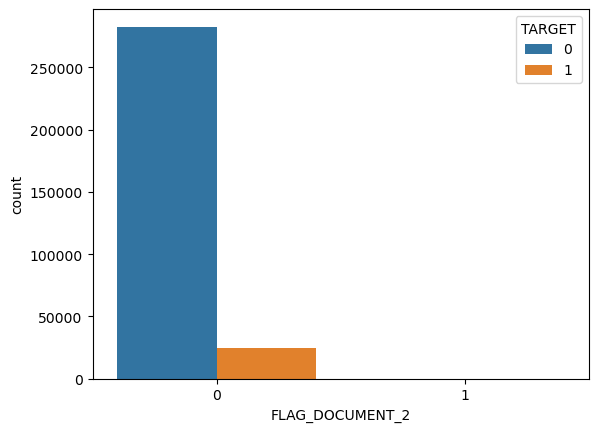

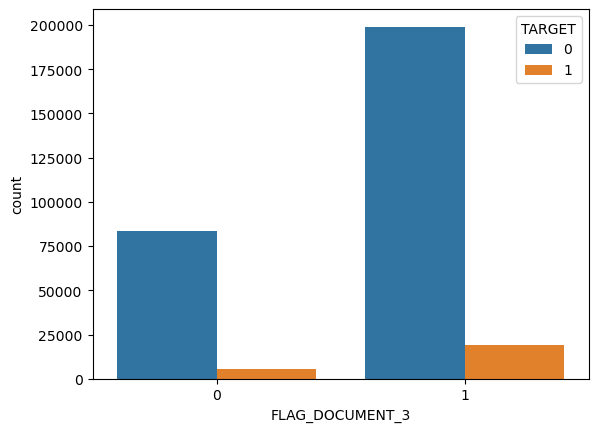

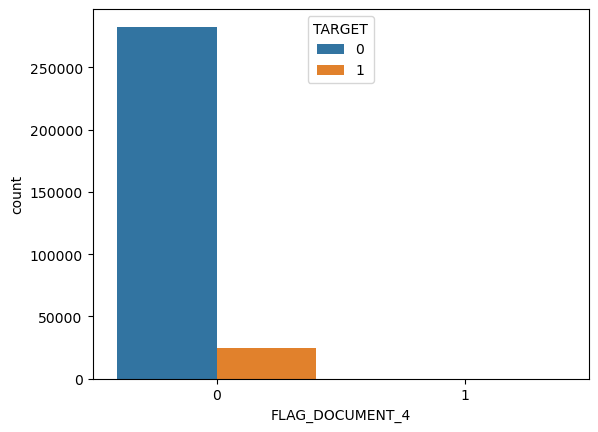

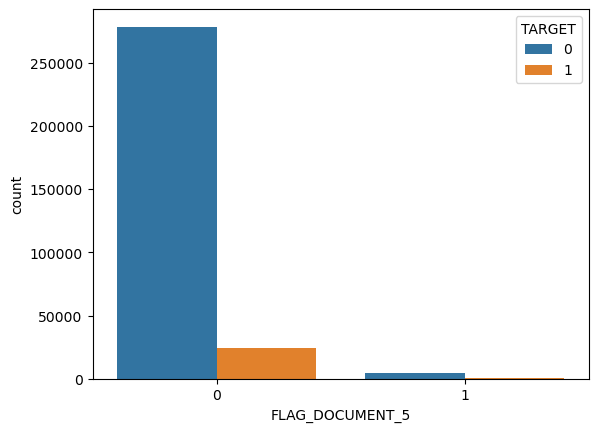

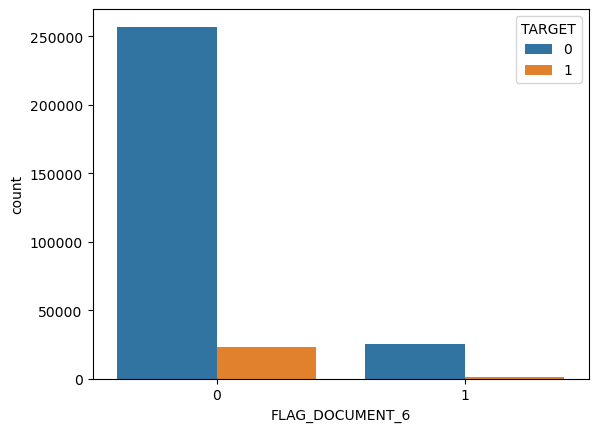

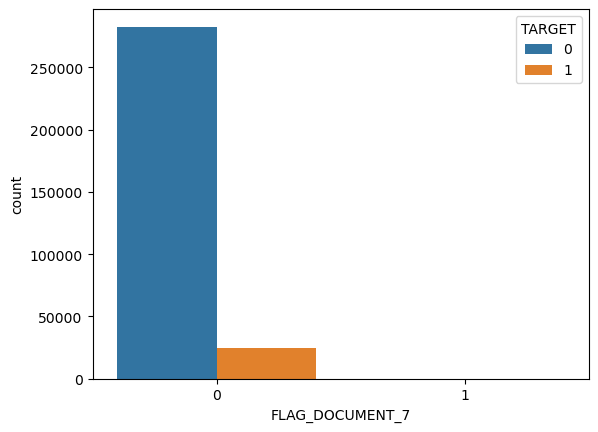

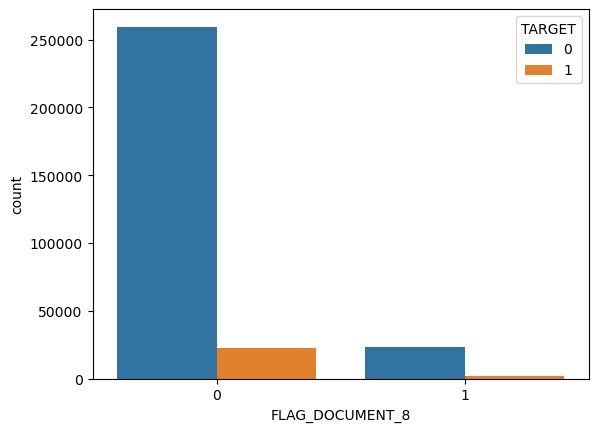

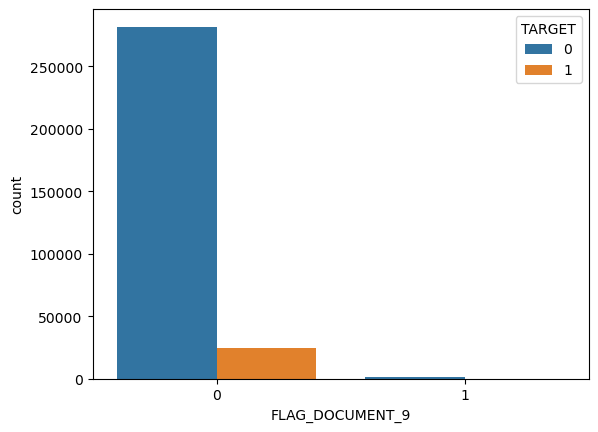

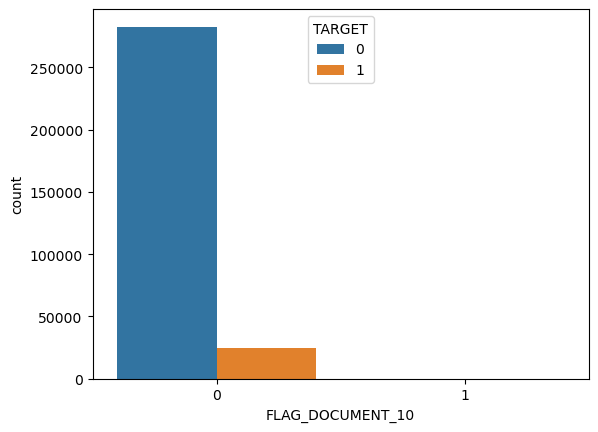

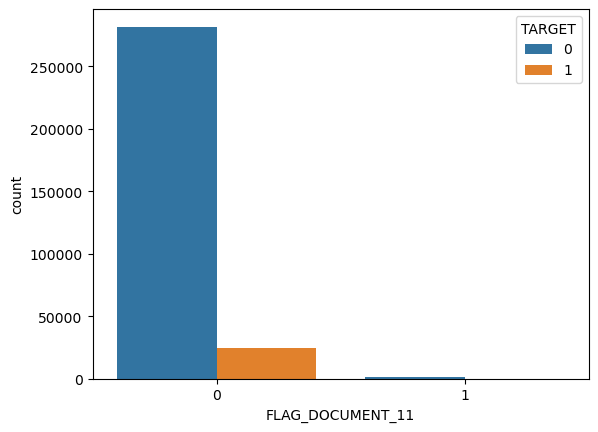

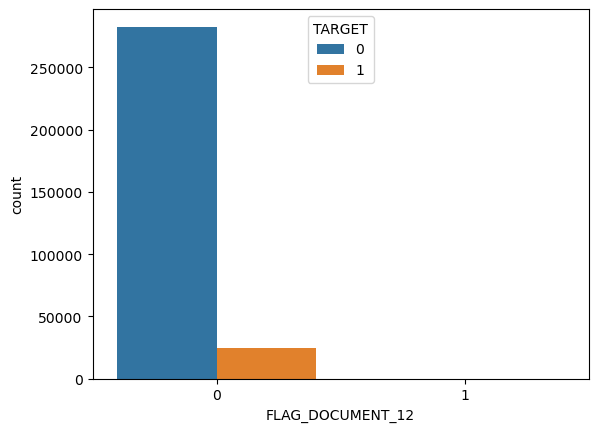

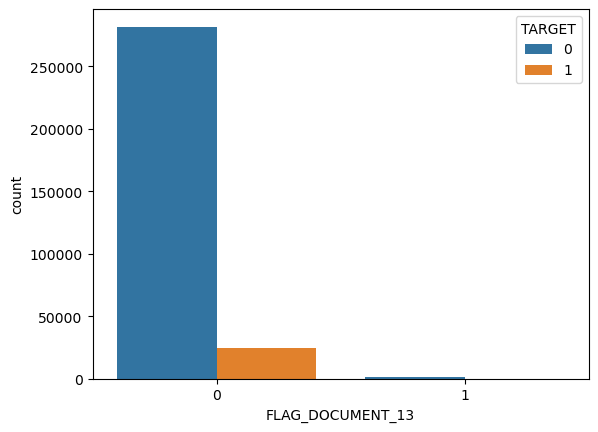

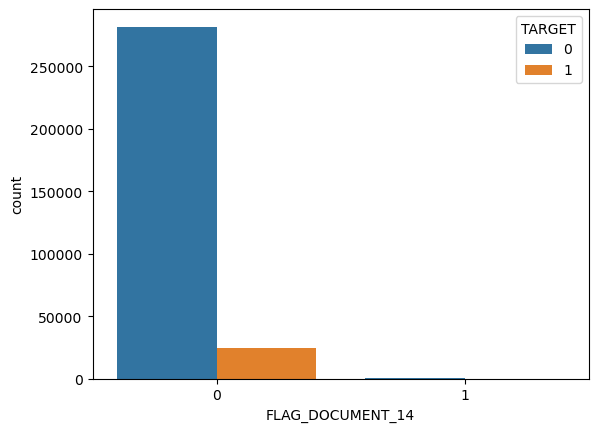

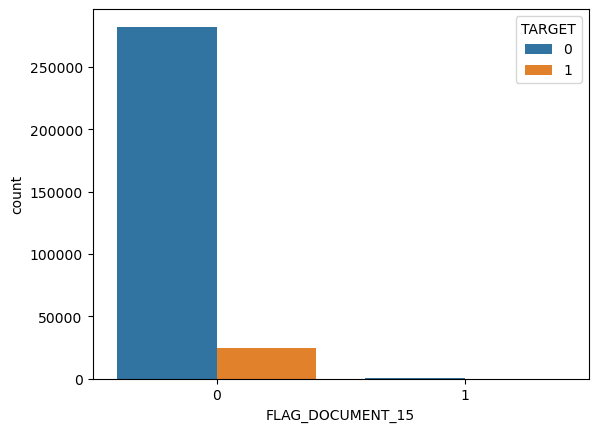

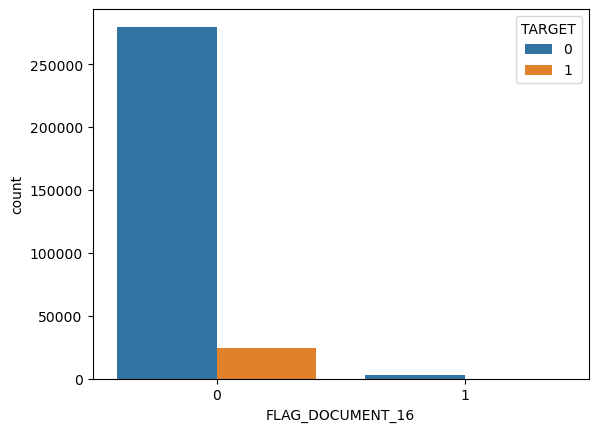

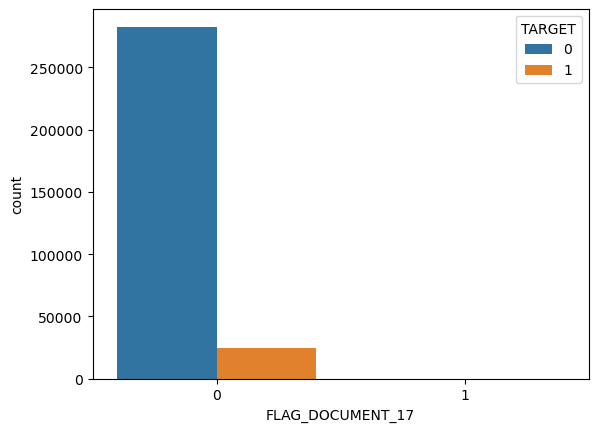

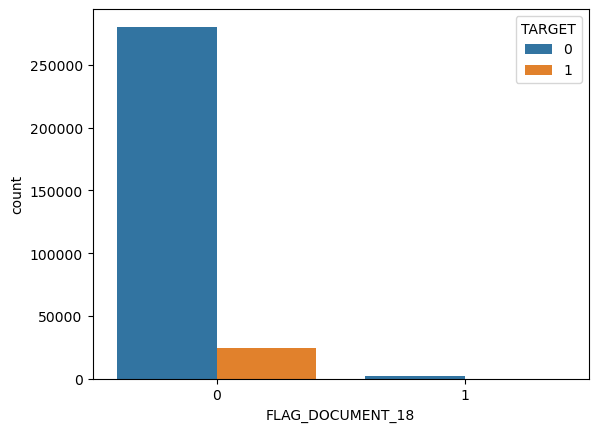

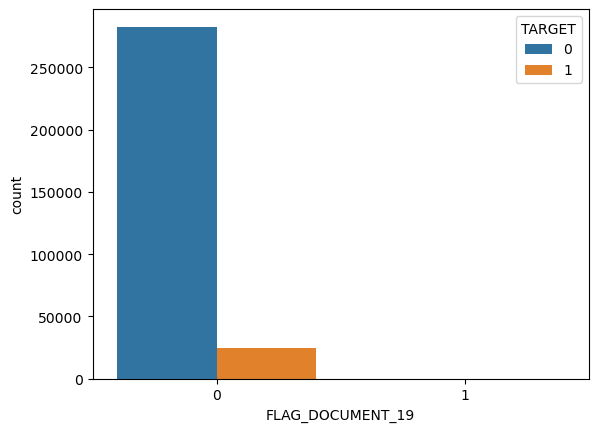

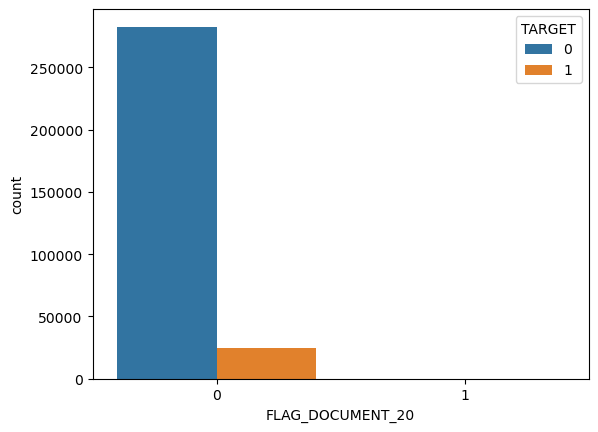

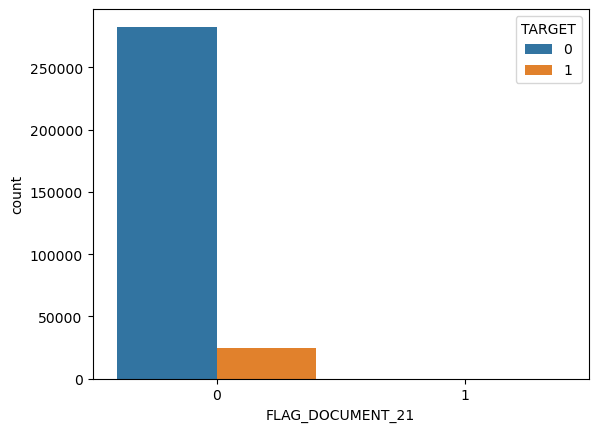

In [207]:
i = 0
for col in FLAG_DOCUMENT_COLS:
    print('Column - ', col, '---------------------')
    plt.figure(i)
    sns.countplot( x= col, hue="TARGET", data=application_data)
    i+=1
    

In [246]:
def fetch_default_ratio(variable):
    default_ratio = application_data[[variable, 'TARGET']].groupby([variable],as_index=False).mean()
    default_ratio['TARGET'] = default_ratio['TARGET'] * 100
    return default_ratio


In [247]:
for col in cat_cols:
    print('Default Ratio for ', col)
    print(fetch_default_ratio(col).sort_values('TARGET',ascending=False))
    print('-----------------------------')

Default Ratio for  WEEKDAY_APPR_PROCESS_START
  WEEKDAY_APPR_PROCESS_START    TARGET
5                    TUESDAY  8.350494
6                  WEDNESDAY  8.160357
0                     FRIDAY  8.146927
4                   THURSDAY  8.100255
3                     SUNDAY  7.929053
2                   SATURDAY  7.887274
1                     MONDAY  7.757227
-----------------------------
Default Ratio for  NAME_HOUSING_TYPE
     NAME_HOUSING_TYPE     TARGET
4     Rented apartment  12.313051
5         With parents  11.698113
2  Municipal apartment   8.539748
0      Co-op apartment   7.932264
1    House / apartment   7.795711
3     Office apartment   6.572411
-----------------------------
Default Ratio for  OCCUPATION_TYPE
          OCCUPATION_TYPE     TARGET
9      Low-skill Laborers  17.152413
4                 Drivers  11.326130
18   Waiters/barmen staff  11.275964
16         Security staff  10.742449
8                Laborers  10.578770
2           Cooking staff  10.443996
14           

In [248]:
print(fetch_default_ratio('AGE_GROUP').sort_values('TARGET',ascending=False))

  AGE_GROUP     TARGET
1   20 - 30  11.398542
2   30 - 40   9.286909
3   40 - 50   7.550974
4   50 - 60   5.933440
5  60 above   4.920321
0    0 - 20   0.000000


In [249]:
print(fetch_default_ratio('AMT_INCOME_GROUP').sort_values('TARGET',ascending=False))

  AMT_INCOME_GROUP    TARGET
1      100K - 200K  8.547897
0         0 - 100K  8.202769
2      200K - 300K  7.550325
3      300K - 400K  6.030253
4      400K - 500K  6.006342
5       500K Above  5.424144


In [255]:
print(fetch_default_ratio('CNT_FAM_MEMBERS').sort_values('CNT_FAM_MEMBERS',ascending=False))

    CNT_FAM_MEMBERS      TARGET
16             20.0    0.000000
15             16.0    0.000000
14             15.0    0.000000
13             14.0    0.000000
12             13.0  100.000000
11             12.0    0.000000
10             11.0  100.000000
9              10.0   33.333333
8               9.0    0.000000
7               8.0   30.000000
6               7.0    7.407407
5               6.0   13.480392
4               5.0    9.401955
3               4.0    8.648824
2               3.0    8.760290
1               2.0    7.583402
0               1.0    8.364408


In [257]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [260]:
print(fetch_default_ratio('YEARS_EMPLOYED').sort_values('YEARS_EMPLOYED',ascending=False))

    YEARS_EMPLOYED     TARGET
50            1000   5.399646
49              49   0.000000
48              48   0.000000
47              47   0.000000
46              46   0.000000
45              45   0.000000
44              44   3.225806
43              43   0.000000
42              42   0.000000
41              41   0.000000
40              40   0.000000
39              39   3.200000
38              38   1.724138
37              37   0.724638
36              36   1.530612
35              35   2.334630
34              34   3.296703
33              33   3.625378
32              32   5.413105
31              31   3.432494
30              30   4.814004
29              29   4.938272
28              28   5.073650
27              27   2.286585
26              26   2.756508
25              25   4.872107
24              24   5.361050
23              23   5.118110
22              22   4.389465
21              21   5.065024
20              20   4.187500
19              19   4.703367
18        

# FEATURE SELECTION 

Categorical Features importance

In [113]:
num_cols, cat_cols = fetch_numerical_and_cateogrical_columns(application_data)

In [136]:
cat_vars = cat_cols
cont_tables = []
for var in cat_vars:
    cont_table = pd.crosstab(application_data[var], application_data['TARGET'])
    cont_tables.append(cont_table)

# Compute the Chi-Square Test for each contingency table
p_values = []
for cont_table in cont_tables:
    chi2, p, dof, expected = chi2_contingency(cont_table)
    p_values.append(p)

# Rank the categorical variables based on their p-values
results = pd.DataFrame({'Variable': cat_vars, 'P-value': p_values})
results = results.sort_values(by='P-value')
print(results)

                      Variable        P-value
2              OCCUPATION_TYPE   0.000000e+00
4            ORGANIZATION_TYPE  5.224541e-299
5             NAME_INCOME_TYPE  1.928146e-266
11         NAME_EDUCATION_TYPE  2.447681e-219
10                 CODE_GENDER  1.129022e-200
9           NAME_FAMILY_STATUS  7.744842e-107
1            NAME_HOUSING_TYPE   1.099089e-88
8           NAME_CONTRACT_TYPE   1.023515e-65
7                 FLAG_OWN_CAR   9.330994e-34
3              NAME_TYPE_SUITE   1.669680e-05
6              FLAG_OWN_REALTY   6.681470e-04
0   WEEKDAY_APPR_PROCESS_START   1.744737e-02


In [140]:
results[results['P-value'] > 0.05]

,Variable,P-value


In [120]:
num_cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_11',
 'AMT_GOODS_PRICE',
 'FLAG_DOCUMENT_12',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_7',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_13',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_4',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_18',
 'DAYS_BIRTH',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_DOCUMENT_21',
 'TARGET',
 'SK_ID_CURR',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_C

In [121]:
num_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'REG_REGION_NOT_LIVE_REGION',
 'DAYS_BIRTH',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'REG_CITY_NOT_WORK_CITY',
 'YEARS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'REG_REGION_NOT_WORK_REGION',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AGE',
 'REGION_POPULATION_RELATIVE',
 'PREVIOUS_APPLICATIONS_COUNT']

Feature importance between TARGET and numerical variables

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# assuming X is your feature matrix and y is your binary target variable
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=10) # choose the desired number of features
rfe.fit(application_data[num_cols], application_data['TARGET'])

# print the selected features
selected_features = [f for f, s in zip(application_data[num_cols].columns, rfe.support_) if s]
print(selected_features)

X:\Users\Ahmad_Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
X:\Users\Ahmad_Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

X:\Users\Ahmad_Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
X:\Users\Ahmad_Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

['DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'PREVIOUS_APPLICATIONS_COUNT']


In [141]:
# select the binary features and the binary target
binary_features = [
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_21',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
]
binary_target = 'TARGET'

# initialize empty lists to store the chi-square statistic and p-value for each feature
chi2_stats = []
p_values = []

# loop over each binary feature and compute the chi-square test
for feature in binary_features:
    contingency_table = pd.crosstab(application_data[feature], application_data[binary_target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p)

# create a DataFrame to store the results
results = pd.DataFrame({'feature': binary_features, 'chi2_statistic': chi2_stats, 'p_value': p_values})

# sort the results by decreasing p-value to get the most important features first
flag_feature_results = results.sort_values('p_value')

# print the results
print(flag_feature_results)

             feature  chi2_statistic        p_value
15    FLAG_EMP_PHONE      649.751181  2.530606e-143
10   FLAG_DOCUMENT_3      604.391958  1.855748e-133
4    FLAG_DOCUMENT_6      251.194642   1.425605e-56
24   FLAG_WORK_PHONE      249.940305   2.675800e-56
3         FLAG_PHONE      174.084004   9.489418e-40
13  FLAG_DOCUMENT_16       41.054496   1.480432e-10
9   FLAG_DOCUMENT_13       40.544766   1.921626e-10
19  FLAG_DOCUMENT_14       26.903604   2.138598e-07
22   FLAG_DOCUMENT_8       19.772100   8.724696e-06
16  FLAG_DOCUMENT_18       19.123403   1.225331e-05
11  FLAG_DOCUMENT_15       12.454144   4.170655e-04
5    FLAG_DOCUMENT_2        6.224739   1.259775e-02
23   FLAG_DOCUMENT_9        5.571672   1.825333e-02
1   FLAG_DOCUMENT_11        5.254677   2.188786e-02
17  FLAG_DOCUMENT_21        3.518213   6.069787e-02
14  FLAG_DOCUMENT_17        2.789807   9.486563e-02
12   FLAG_DOCUMENT_4        1.242490   2.649918e-01
0         FLAG_EMAIL        0.923096   3.366633e-01
20  FLAG_DOC

In [142]:
flag_feature_results[flag_feature_results['p_value'] > 0.05]['feature'].tolist()

['FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_4',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_5',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12']

In [143]:
selected_features + flag_feature_results[flag_feature_results['p_value'] > 0.05]['feature'].tolist()

['DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'PREVIOUS_APPLICATIONS_COUNT',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_4',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_5',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12']